## **CIND820 - Capstone Project**



# **Investigate Airline passenger satisfaction using Machine Learning Techniques**


# **Preparation:**

In [ ]:
# check python version
! python -V

Python 3.10.12


In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install pyECLAT -q

In [ ]:
!pip install mlxtend

In [ ]:
!pip install fpgrowth-py

In [ ]:
!pip install --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.24.0 which is incompatible.


In [ ]:
pip install tabulate

In [ ]:
# Importing required libraries

import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.feature_selection as fs
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif
import sklearn.feature_selection as fs

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from tabulate import tabulate

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# from xgboost import XGBClassifier

import sklearn
import time
from resource import getrusage, RUSAGE_SELF
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from mlxtend.frequent_patterns import fpgrowth
# from fpgrowth_py import fpgrowth

# from pyECLAT import ECLAT

# from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Import csv file (the dataset and the data dictionary)



In [ ]:
# Import the dataset
# Use first column "ID" as Index by using index_col=0

url = 'https://raw.githubusercontent.com/HitomiMo/CIND820_Capstone-Project/main/airline_passenger_satisfaction.csv'
df1 = pd.read_csv(url, index_col=0)
df1.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
# Import the dictionary

url2 = 'https://raw.githubusercontent.com/HitomiMo/CIND820_Capstone-Project/main/data_dictionary.csv'
data_dictionary = pd.read_csv(url2, index_col=0)
data_dictionary

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger...
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


# **Exploratory Data Analysis (EDA)**

Install pandas-profiling

In [ ]:
# from pandas_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df1.head(10)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
6,Male,43,Returning,Business,Business,3788,0,0.0,4,4,...,4,4,4,3,3,4,4,4,4,Satisfied
7,Male,43,Returning,Business,Business,1963,0,0.0,3,3,...,5,5,5,4,5,5,3,5,5,Satisfied
8,Female,60,Returning,Business,Business,853,0,3.0,3,4,...,3,4,4,4,4,3,4,3,3,Satisfied
9,Male,50,Returning,Business,Business,2607,0,0.0,1,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied


Check the dataset

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

**Observations:**
*   Number of variable: 23
*   Number of entries: 129880




Check missing data

In [ ]:
missing_values = pd.isnull(df1)
missing_values.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

Check description of the data

In [ ]:
df1.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Check distribution of numerical variables in histgram

In [ ]:
# import numpy as np
# import seaborn as sns
# from matplotlib import pyplot as plt

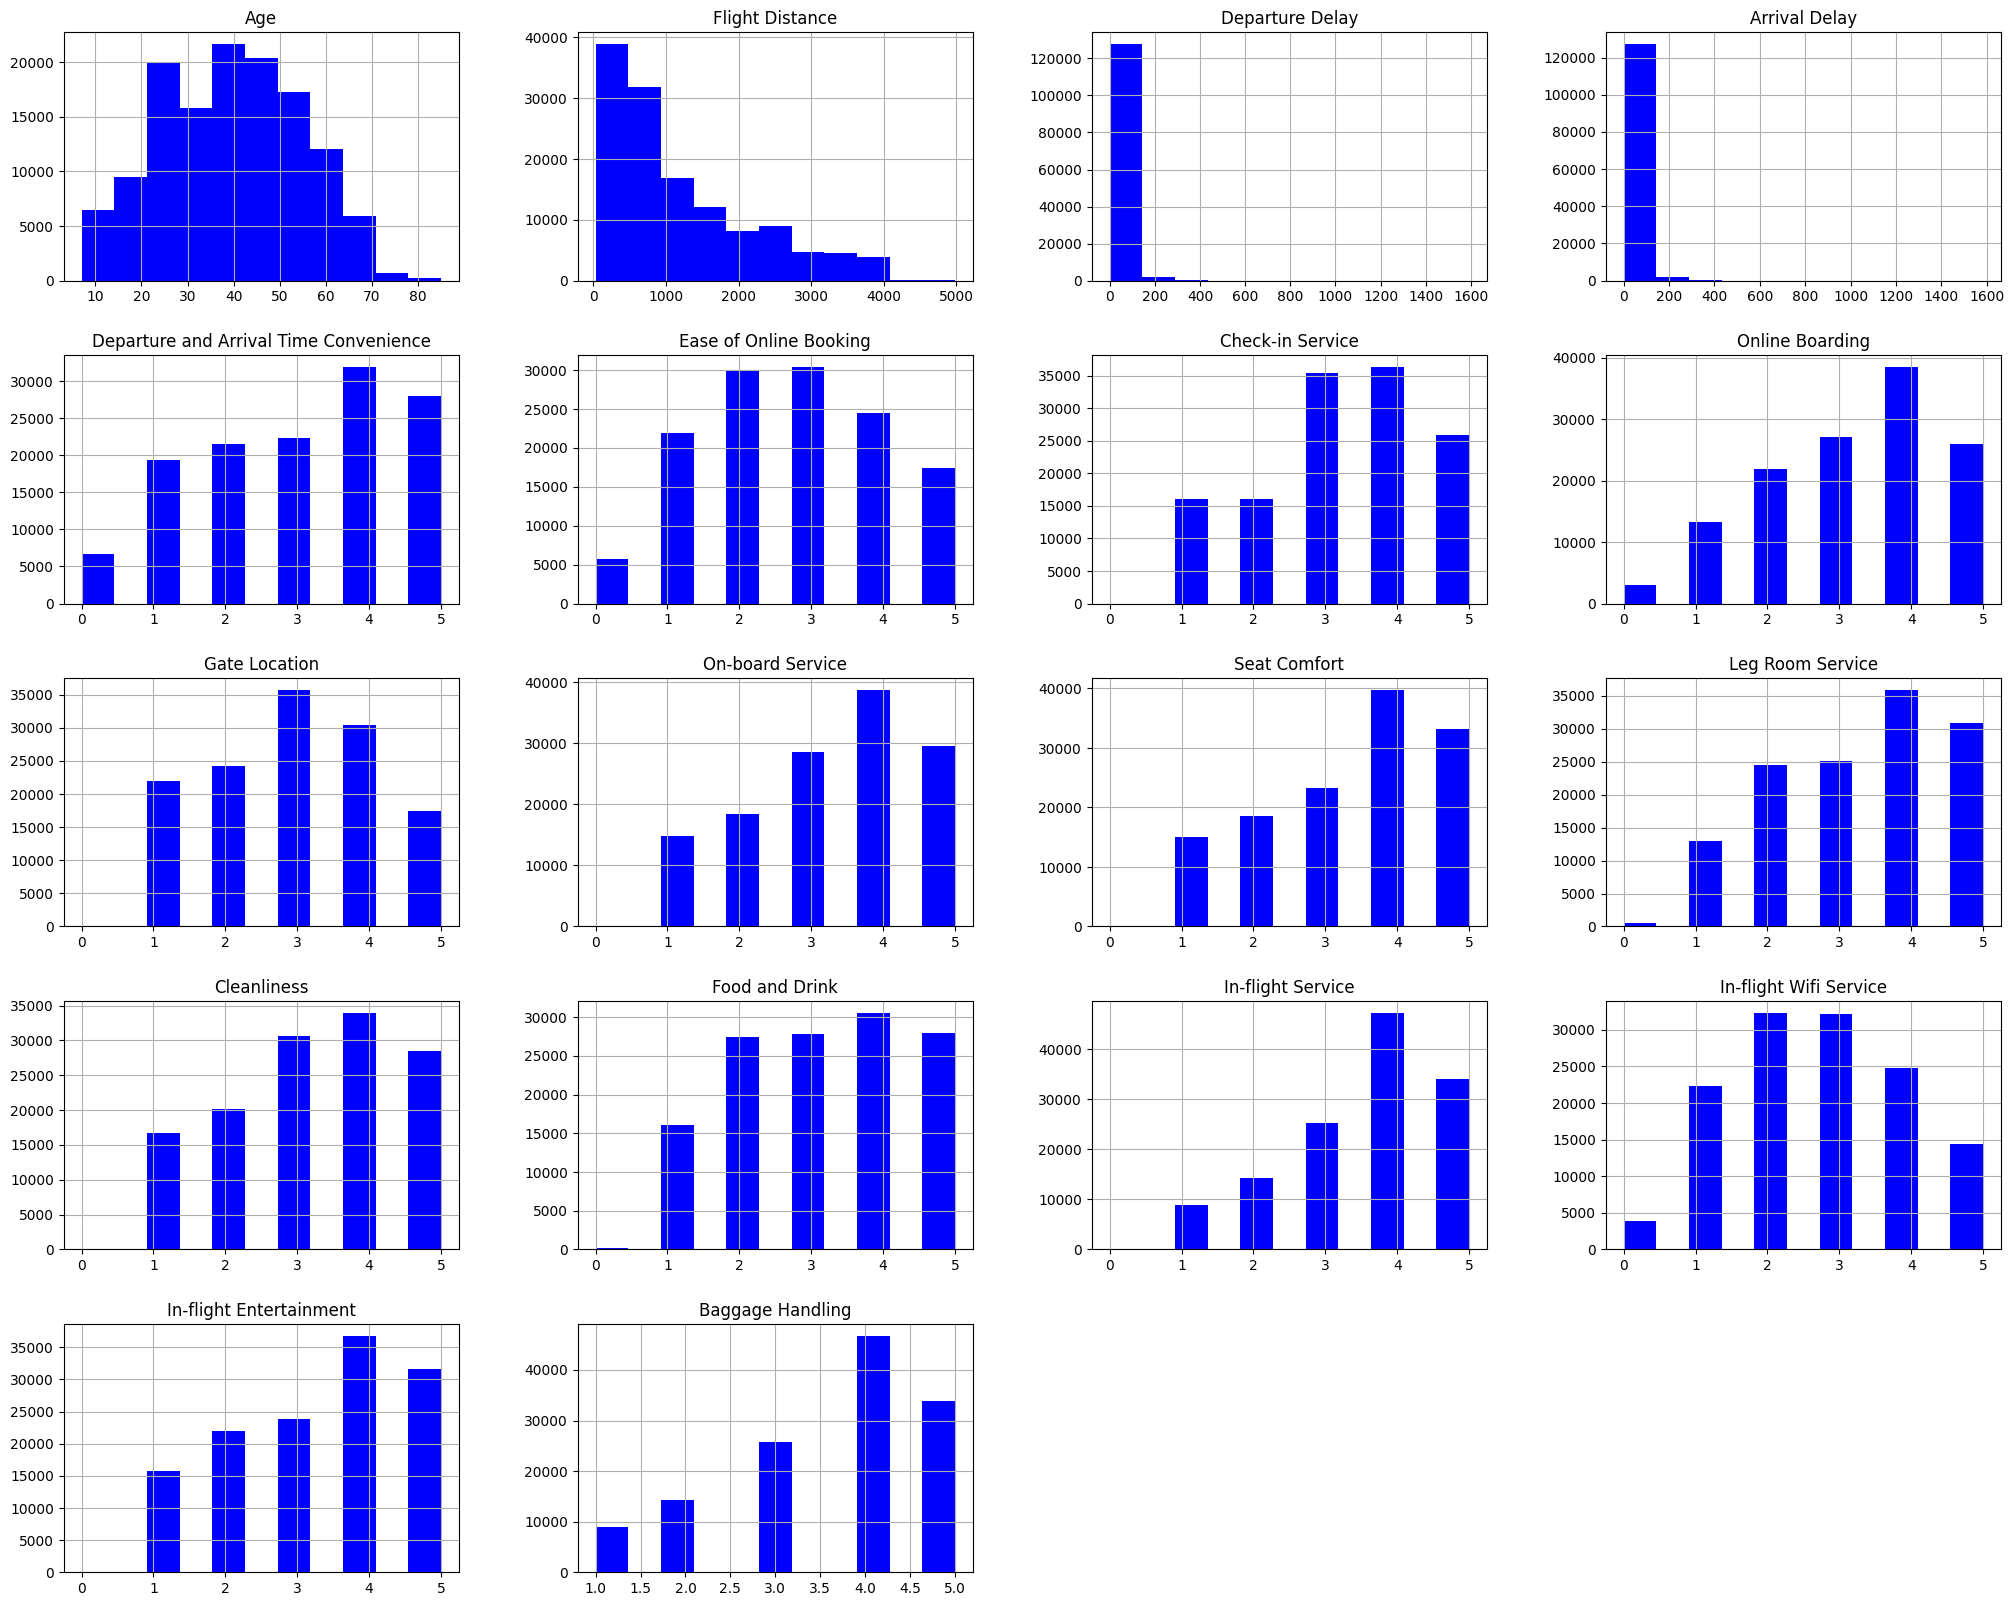

In [ ]:
binwidth=2
df1.iloc[:,1:].hist(bins=11, figsize=(25,20), color='blue')
plt.show()

Check categorical veriables

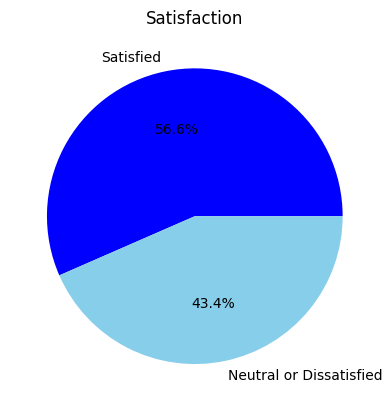

In [ ]:
y = df1["Satisfaction"].value_counts()
labels = ["Satisfied", "Neutral or Dissatisfied"]
mycolors = ["blue", "skyblue"]
y = df1["Satisfaction"].value_counts()
plt.pie(y, labels = labels, colors = mycolors, autopct = '%1.1f%%')
plt.title('Satisfaction')
plt.show()

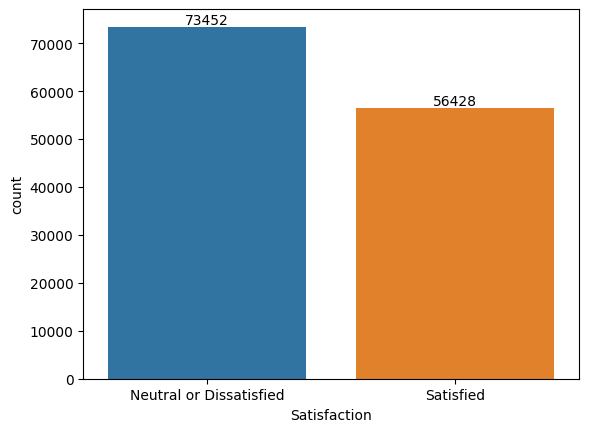

In [ ]:
# ChecK the # of customers - Satisfaction
mycolors2 = ["blue", "skyblue"]
s = sns.countplot(x='Satisfaction',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

**Observation:**


*   Satisfaction is a terget class and it is imbalanced.



Pie chart for Gender

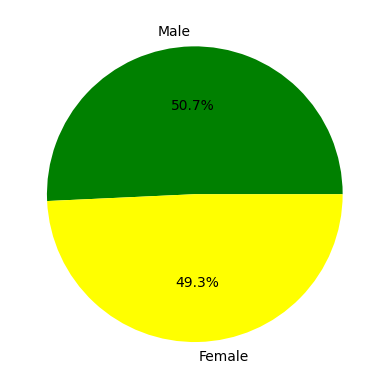

In [ ]:
y = df1["Gender"].value_counts()
labels = ["Male", "Female"]
mycolors = ["Green", "Yellow"]
plt.pie(y, labels = labels,colors=mycolors ,autopct='%1.1f%%')
plt.show()

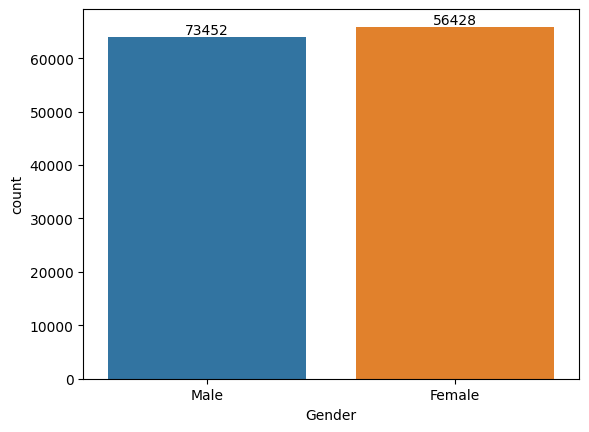

In [ ]:
# ChecK the # of customers - Gender
s = sns.countplot(x='Gender',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

In [ ]:
# Grouping the data points based on Gender
df1.groupby('Gender')['Satisfaction'].value_counts()

Gender  Satisfaction           
Female  Neutral or Dissatisfied    37630
        Satisfied                  28269
Male    Neutral or Dissatisfied    35822
        Satisfied                  28159
Name: Satisfaction, dtype: int64

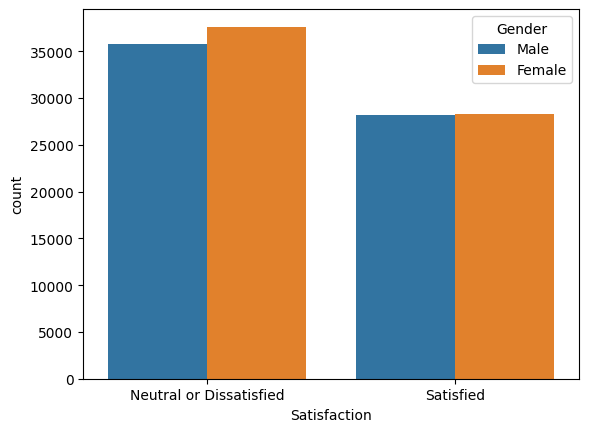

In [ ]:
sns.countplot(data = df1, x= df1['Satisfaction'], hue = df1["Gender"]);

Pie chart for Customer Type

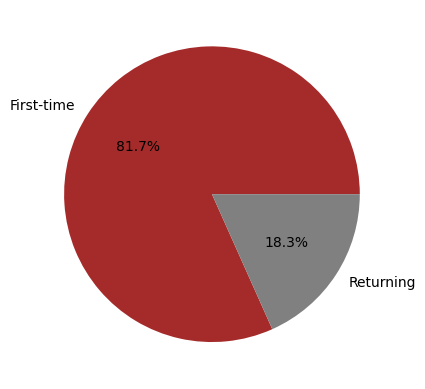

In [ ]:
y = df1["Customer Type"].value_counts()
labels = ["First-time", "Returning"]
mycolors = ["Brown", "Gray"]
plt.pie(y, labels = labels,colors=mycolors ,autopct='%1.1f%%')
plt.show()

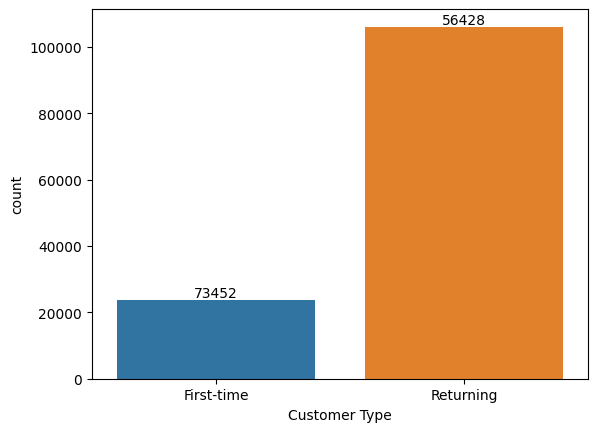

In [ ]:
# ChecK the # of customers - Customer Type
s = sns.countplot(x='Customer Type',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

In [ ]:
# Grouping the data points based on Customer Type
df1.groupby('Customer Type')['Satisfaction'].value_counts()

Customer Type  Satisfaction           
First-time     Neutral or Dissatisfied    18080
               Satisfied                   5700
Returning      Neutral or Dissatisfied    55372
               Satisfied                  50728
Name: Satisfaction, dtype: int64

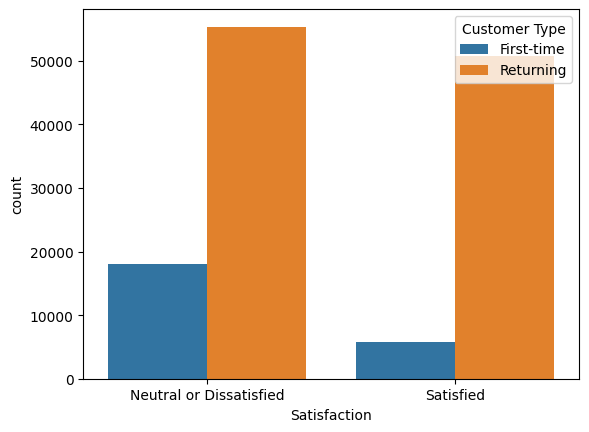

In [ ]:
sns.countplot(data = df1, x= df1['Satisfaction'], hue = df1["Customer Type"]);

Pic chart for Type of Travel

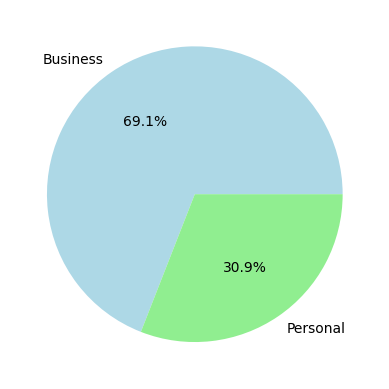

In [ ]:
y = df1["Type of Travel"].value_counts()
labels = ["Business", "Personal"]
mycolors = ["Lightblue", "Lightgreen"]
plt.pie(y, labels = labels,colors=mycolors ,autopct='%1.1f%%')
plt.show()

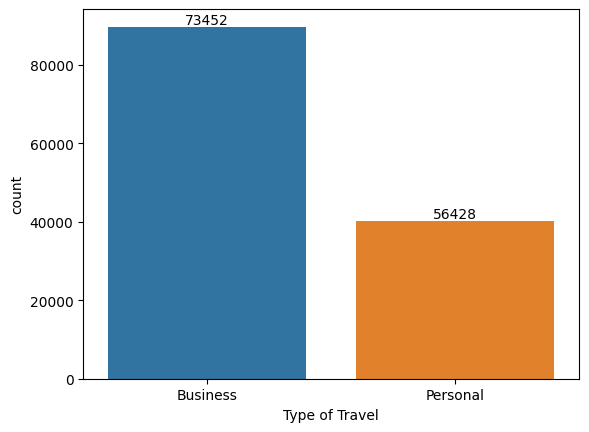

In [ ]:
# ChecK the # of customers - Customer Type
s = sns.countplot(x='Type of Travel',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

In [ ]:
# Grouping the data points based on Type of Travel
df1.groupby('Type of Travel')['Satisfaction'].value_counts()

Type of Travel  Satisfaction           
Business        Satisfied                  52356
                Neutral or Dissatisfied    37337
Personal        Neutral or Dissatisfied    36115
                Satisfied                   4072
Name: Satisfaction, dtype: int64

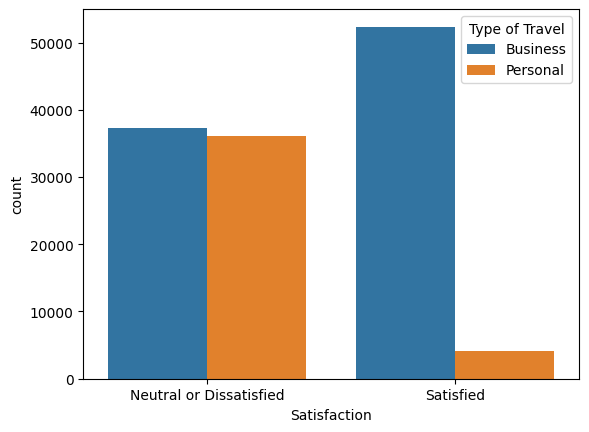

In [ ]:
sns.countplot(data = df1, x= df1['Satisfaction'], hue = df1["Type of Travel"]);

Pic chart for Class

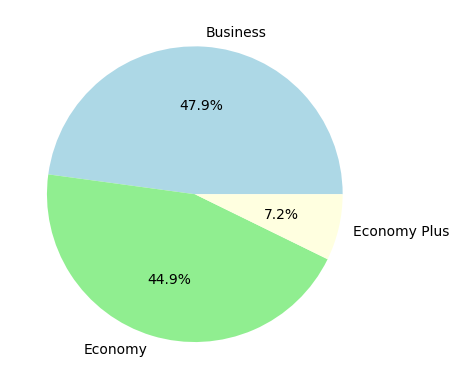

In [ ]:
y = df1["Class"].value_counts()
labels = ["Business", "Economy", "Economy Plus"]
mycolors = ["Lightblue", "Lightgreen", "Lightyellow"]
plt.pie(y, labels = labels,colors=mycolors ,autopct='%1.1f%%')
plt.show()

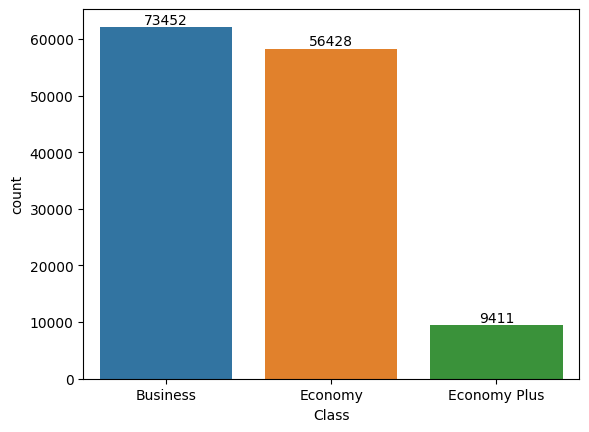

In [ ]:
# ChecK the # of customers - Customer Type
s = sns.countplot(x='Class',data=df1)
abs_values = df1['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

In [ ]:
# Grouping the data points based on Class
df1.groupby('Class')['Satisfaction'].value_counts()

Class         Satisfaction           
Business      Satisfied                  43166
              Neutral or Dissatisfied    18994
Economy       Neutral or Dissatisfied    47366
              Satisfied                  10943
Economy Plus  Neutral or Dissatisfied     7092
              Satisfied                   2319
Name: Satisfaction, dtype: int64

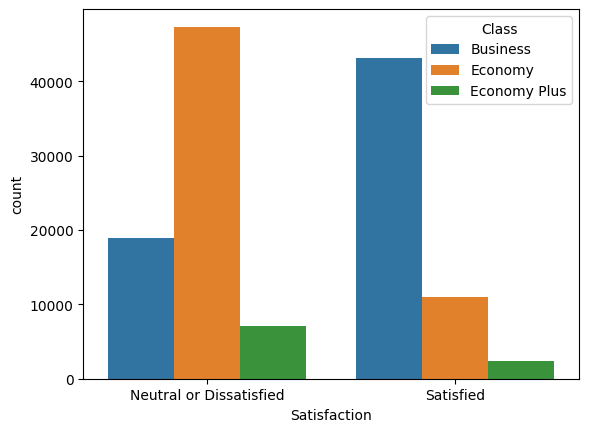

In [ ]:
sns.countplot(data = df1, x= df1['Satisfaction'], hue = df1["Class"]);

Check correlation matrix

<ipython-input-29-46ea086570be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr() , annot = True , cmap = "YlGnBu")


<Axes: >

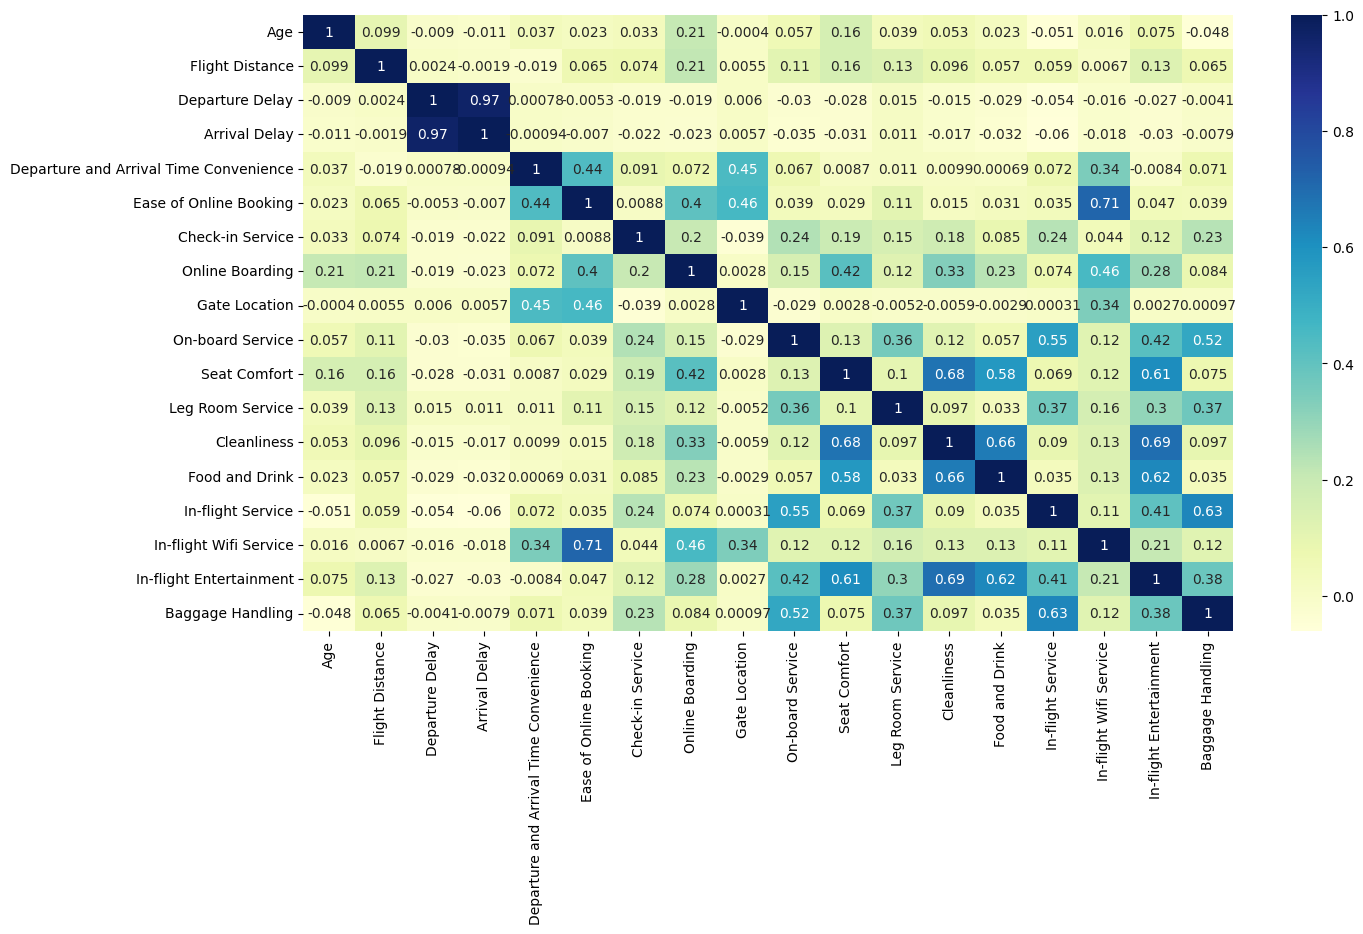

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(df1.corr() , annot = True , cmap = "YlGnBu")

**Observation:**


*   **Strong positive correlation** between Arrival Delay and Departure Delay which is 0.97.
*   **Moderate positive correlation** between In-flight Wi-Fi Service and Ease of Online Booking which is 0.71.








Check outliers of numerical variables in histgram

In [ ]:
# df1.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

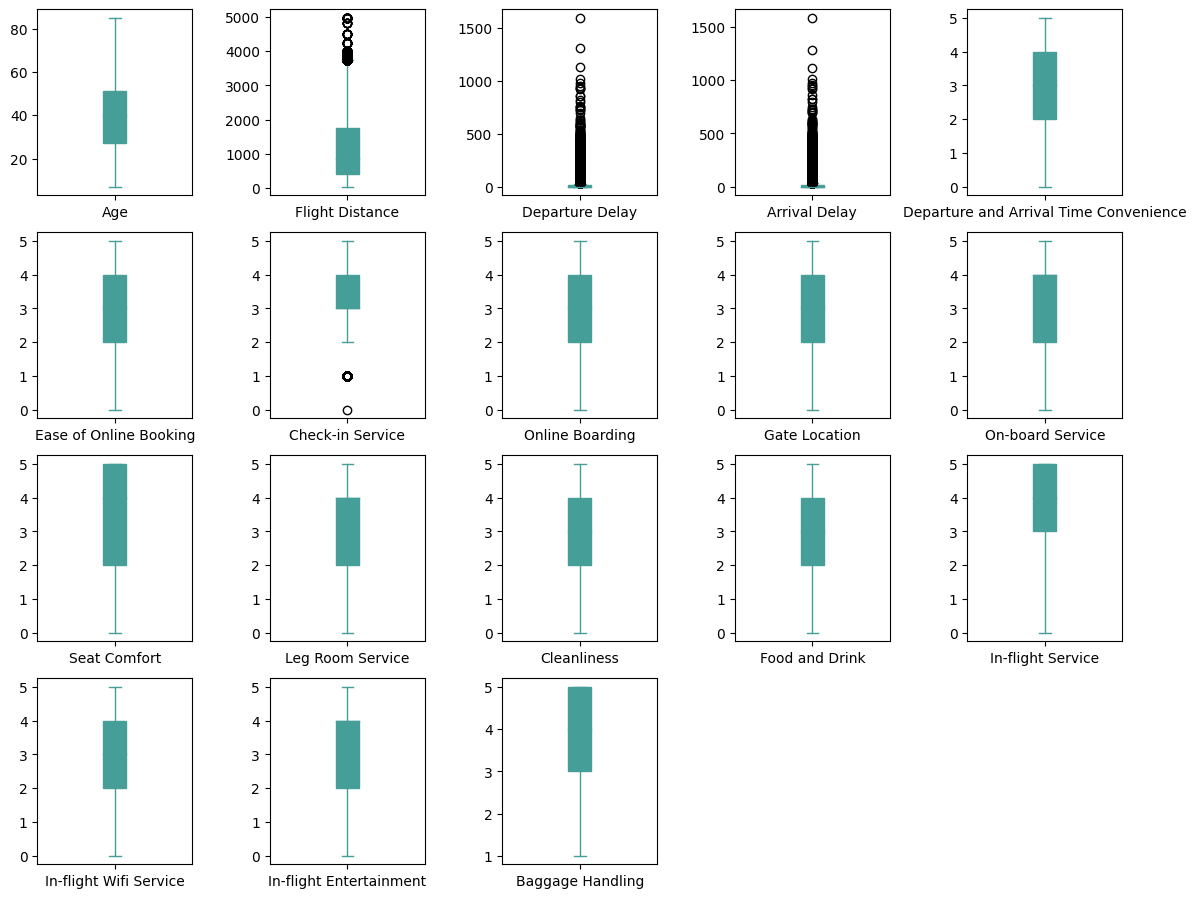

In [ ]:
df1.plot(kind='box', subplots=True, layout=(5,5), figsize=(14,14),patch_artist=True,color="#459E97")
plt.subplots_adjust(wspace = 0.5)

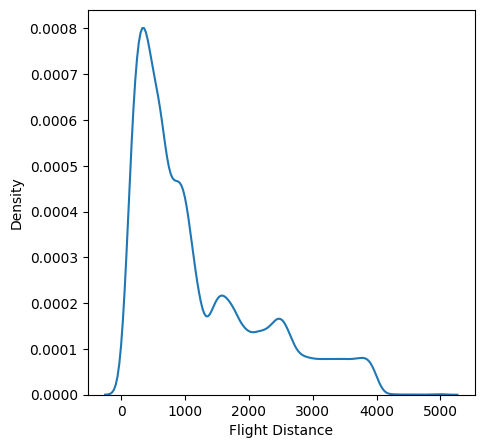

In [ ]:
# check distribution of Flight Distance
plt.figure(figsize = (5,5))
sns.kdeplot(df1['Flight Distance']);

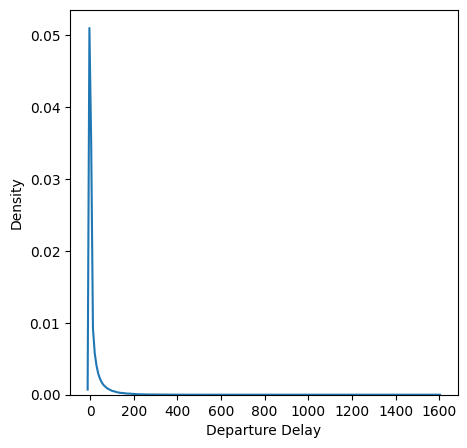

In [ ]:
# check distribution of Departure Delay
plt.figure(figsize = (5,5))
sns.kdeplot(df1['Departure Delay']);

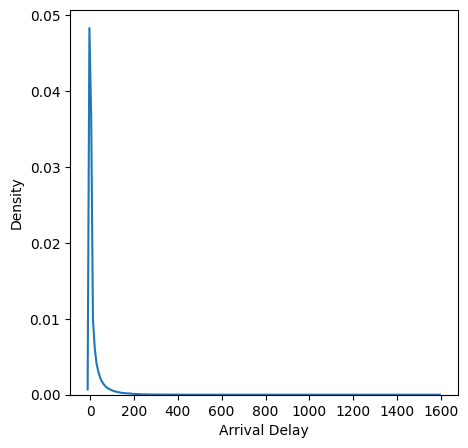

In [ ]:
# check distribution of Arrival Delay
plt.figure(figsize = (5,5))
sns.kdeplot(df1['Arrival Delay']);

Observation:


*   Outliers in Flight Distance, Departure Delay and Arrival Delay
*   The distribution of all three variables are right skewed (Positively Skewed). This means that the mean is often greater than the median.
*   Arrival Delay includes 393 missing values.





# **Supervised Machine Learning**

## **Data preparation for Supervised Machine Learning**

**Split the original dataset (df1) into Traing set and Test set after removing missing values**

In [ ]:
df1.info()

In [ ]:
df1['Arrival Delay'].isnull().sum()

393

In [ ]:
# Checking % of missing values
percent_missing = df1['Arrival Delay'].isnull().sum() * 100 / len(df1['Arrival Delay'])
percent_missing

0.3025870033877425

In [ ]:
# Missing value ratio is only 0.3%. Therefore, I will remove missing values before splitting dataset
df2 = df1.copy()
df2 = df2.dropna(how='any',axis=0)
df2.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [ ]:
# check the # of entries after removing missing values
row_count = len(df2.index)
row_count

129487

In [ ]:
# prep for data split. The response variable (y) is Satisfaction.
df3 = df2.copy()
X = df3.drop(['Satisfaction'], axis=1)
y = df3['Satisfaction']

In [ ]:
# split the data set into four pieces - X_train. X_test, y_train and y_test.
# randomly sampling without replacement about 80% into training set and 20% into test set.
# spliting dataset is 80% training set and 20% test set is most commmon ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0 , test_size=0.20, shuffle=True)

In [ ]:
# view first few rows of train set
X_train.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,,,,,,,,,,,,,,,,,,,,,
41758,Female,58,Returning,Business,Economy Plus,230,0,0.0,1,1,...,1,4,4,4,3,3,4,4,4,4
121068,Female,25,Returning,Business,Business,861,0,0.0,2,2,...,2,5,2,4,2,2,5,2,2,4
43321,Male,42,Returning,Business,Business,3508,0,0.0,3,3,...,3,4,2,4,2,5,4,3,4,4
76604,Male,11,Returning,Business,Business,3338,0,0.0,5,5,...,5,5,4,3,4,4,5,5,4,5
61370,Female,58,Returning,Business,Business,679,0,0.0,3,5,...,3,5,4,4,3,5,5,3,5,5


In [ ]:
# count # of missing value in X_train set
X_train["Arrival Delay"].isnull().sum()

0

In [ ]:
# view first few rows of test set
y_train.head()

ID
41758     Neutral or Dissatisfied
121068                  Satisfied
43321                   Satisfied
76604                   Satisfied
61370                   Satisfied
Name: Satisfaction, dtype: object

In [ ]:
# check the size of each set
print(X_train.shape, X_test.shape)

(103589, 22) (25898, 22)


**Handling outliers of train set**

Use IQR (Inter Quartile Range) to finding the outliers and cap the outliers. Capping is a technique to replace outlier values (Winsorization) and I will use it by using the IQR range.

**Arrival Delay**

<Axes: ylabel='Arrival Delay'>

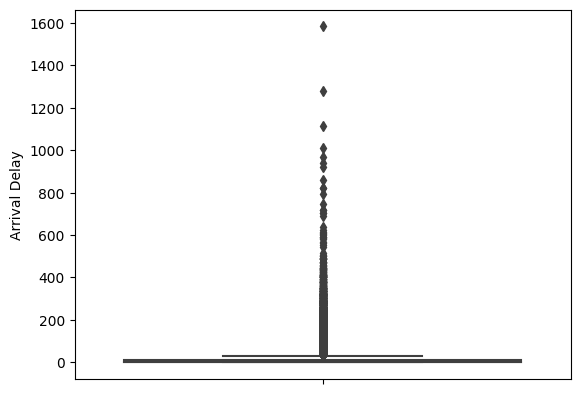

In [ ]:
# before capping outliers
sns.boxplot( y="Arrival Delay", data = X_train)

In [ ]:
# IQR
Q1 = np.percentile(X_train['Arrival Delay'], 25, method='midpoint')
Q3 = np.percentile(X_train['Arrival Delay'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

13.0


In [ ]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

32.5
-19.5


In [ ]:
X_train["Arrival Delay"] = np.where(X_train["Arrival Delay"]> upper_bound, upper_bound,
                           np.where(X_train["Arrival Delay"]< lower_bound, lower_bound,
                           X_train["Arrival Delay"]))

<Axes: ylabel='Arrival Delay'>

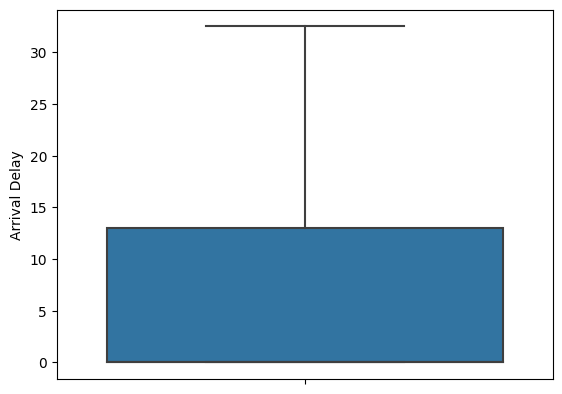

In [ ]:
# after capping outliers
sns.boxplot( y="Arrival Delay", data = X_train)

**Flight Distance**

<Axes: ylabel='Flight Distance'>

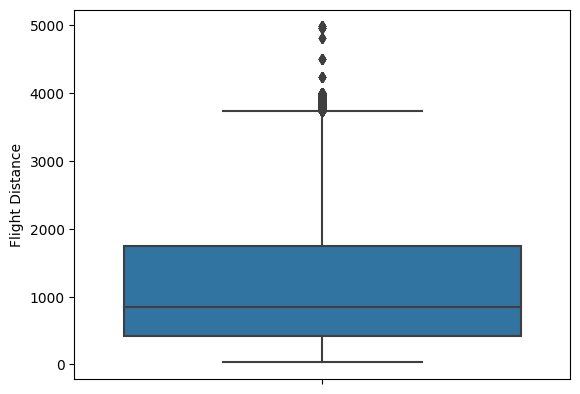

In [ ]:
# before capping outliers
sns.boxplot( y="Flight Distance", data = X_train)

In [ ]:
# IQR
Q1 = np.percentile(df1['Flight Distance'], 25, method='midpoint')
Q3 = np.percentile(df1['Flight Distance'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

1330.0


In [ ]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

3739.0
-1581.0


In [ ]:
X_train["Flight Distance"] = np.where(X_train["Flight Distance"]> upper_bound, upper_bound,
                             np.where(X_train["Flight Distance"]< lower_bound, lower_bound,
                             X_train["Flight Distance"]))

<Axes: ylabel='Flight Distance'>

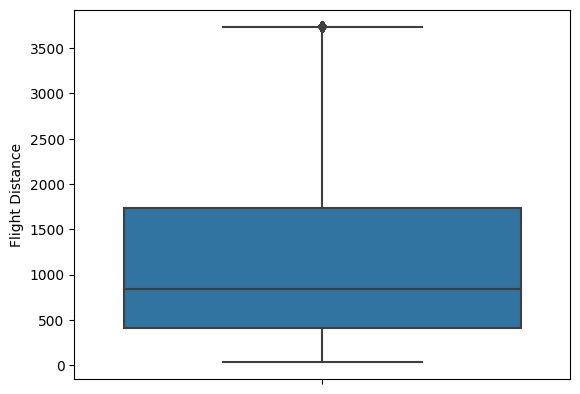

In [ ]:
# after capping outliers
sns.boxplot( y="Flight Distance", data = X_train)

**Departure Delay**

<Axes: ylabel='Departure Delay'>

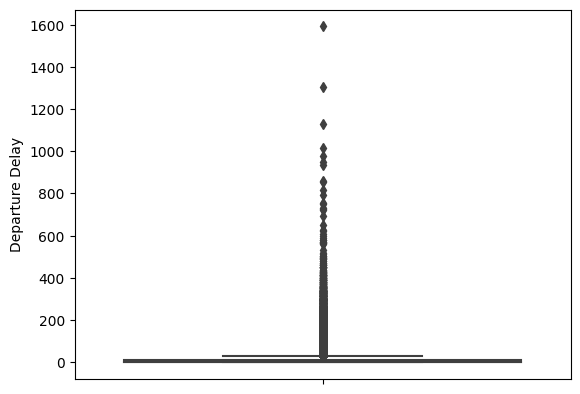

In [ ]:
# before capping outliers
sns.boxplot( y="Departure Delay", data = X_train)

In [ ]:
# IQR
Q1 = np.percentile(df1['Departure Delay'], 25, method='midpoint')
Q3 = np.percentile(df1['Departure Delay'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

12.0


In [ ]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
print(upper_bound)
print(lower_bound)

30.0
-18.0


In [ ]:
X_train["Departure Delay"] = np.where(X_train["Departure Delay"]> upper_bound, upper_bound,
                             np.where(X_train["Departure Delay"]< lower_bound, lower_bound,
                             X_train["Departure Delay"]))

<Axes: ylabel='Departure Delay'>

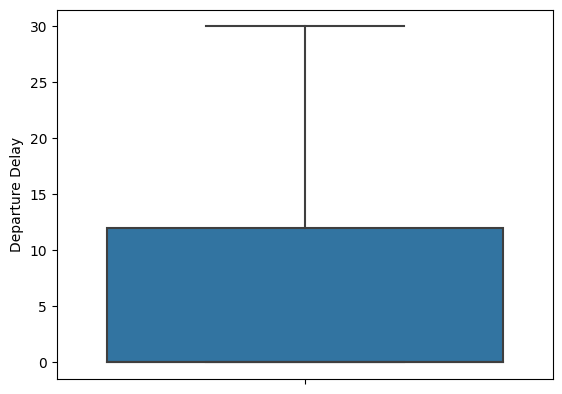

In [ ]:
# after capping outliers
sns.boxplot( y="Departure Delay", data = X_train)

**Encoding all categorical variables (columns with type : object) to numerical variables**

In [ ]:
encoded_X_train = X_train.copy()

In [ ]:
le = LabelEncoder()

In [ ]:
encoded_X_train["Gender"].value_counts()

Female    52530
Male      51059
Name: Gender, dtype: int64

In [ ]:
encoded_X_train["Gender"]=le.fit_transform(encoded_X_train["Gender"])
encoded_X_train["Gender"].value_counts()

0    52530
1    51059
Name: Gender, dtype: int64

In [ ]:
encoded_X_train["Customer Type"].value_counts()

Returning     84564
First-time    19025
Name: Customer Type, dtype: int64

In [ ]:
encoded_X_train["Customer Type"]=le.fit_transform(encoded_X_train["Customer Type"])
encoded_X_train["Customer Type"].value_counts()

1    84564
0    19025
Name: Customer Type, dtype: int64

In [ ]:
encoded_X_train["Type of Travel"].value_counts()

Business    71499
Personal    32090
Name: Type of Travel, dtype: int64

In [ ]:
encoded_X_train["Type of Travel"]=le.fit_transform(encoded_X_train["Type of Travel"])
encoded_X_train["Type of Travel"].value_counts()

0    71499
1    32090
Name: Type of Travel, dtype: int64

In [ ]:
encoded_X_train["Class"].value_counts()

Business        49434
Economy         46706
Economy Plus     7449
Name: Class, dtype: int64

In [ ]:
encoded_X_train["Class"]=le.fit_transform(encoded_X_train["Class"])
encoded_X_train["Class"].value_counts()

0    49434
1    46706
2     7449
Name: Class, dtype: int64

In [ ]:
encoded_X_train.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,,,,,,,,,,,,,,,,,,,,,
41758,0,58,1,0,2,230.0,0.0,0.0,1,1,...,1,4,4,4,3,3,4,4,4,4
121068,0,25,1,0,0,861.0,0.0,0.0,2,2,...,2,5,2,4,2,2,5,2,2,4
43321,1,42,1,0,0,3508.0,0.0,0.0,3,3,...,3,4,2,4,2,5,4,3,4,4
76604,1,11,1,0,0,3338.0,0.0,0.0,5,5,...,5,5,4,3,4,4,5,5,4,5
61370,0,58,1,0,0,679.0,0.0,0.0,3,5,...,3,5,4,4,3,5,5,3,5,5


In [ ]:
y_train.value_counts()

Neutral or Dissatisfied    58687
Satisfied                  44902
Name: Satisfaction, dtype: int64

In [ ]:
encoded_y_train=le.fit_transform(y_train).copy()
encoded_y_train

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
encoded_y_train.value_counts()

Satisfaction
0               58687
1               44902
dtype: int64

In [ ]:
le.classes_

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [ ]:
encoded_y_train = pd.DataFrame(encoded_y_train, index=encoded_y_train)

In [ ]:
encoded_y_train.columns = ['Satisfaction']

In [ ]:
encoded_y_train.head()

,Satisfaction
0,0
1,1
1,1
1,1
1,1


In [ ]:
rows_count = len(encoded_y_train.index)
rows_count

103589

**Encoding test set**

In [ ]:
encoded_X_test = X_test.copy()

le=preprocessing.LabelEncoder()
clm=['Gender', 'Customer Type', 'Type of Travel', 'Class']
for x in clm:
    encoded_X_test[x]=le.fit_transform(encoded_X_test[x])

In [ ]:
encoded_X_test.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,,,,,,,,,,,,,,,,,,,,,
43209,0,54,1,0,0,3342,0,0.0,1,1,...,1,5,5,4,4,3,5,1,5,5
125239,1,21,0,0,1,1149,15,31.0,4,4,...,3,2,1,4,1,1,3,3,1,4
28497,0,63,1,1,0,2688,0,20.0,5,1,...,2,1,3,4,3,1,4,1,5,5
124204,0,50,1,0,0,2176,11,0.0,1,1,...,1,4,5,3,5,3,4,1,4,4
39419,0,22,0,0,1,129,0,0.0,5,4,...,2,5,4,4,4,4,1,4,4,2


In [ ]:
encoded_y_test = y_test.copy()

encoded_y_test = le.fit_transform(y_test)
encoded_y_test

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
encoded_y_test = pd.DataFrame(encoded_y_test, index=encoded_y_test)

In [ ]:
encoded_y_test.columns = ['Satisfaction']

In [ ]:
encoded_y_test.head()

,Satisfaction
1,1
0,0
0,0
1,1
1,1


In [ ]:
rows_count = len(encoded_y_test.index)
rows_count

25898

**Applying Feature Selection to reduce dimensions**

In [ ]:
# before scaling
encoded_X_train.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,,,,,,,,,,,,,,,,,,,,,
41758,0,58,1,0,2,230.0,0.0,0.0,1,1,...,1,4,4,4,3,3,4,4,4,4
121068,0,25,1,0,0,861.0,0.0,0.0,2,2,...,2,5,2,4,2,2,5,2,2,4
43321,1,42,1,0,0,3508.0,0.0,0.0,3,3,...,3,4,2,4,2,5,4,3,4,4
76604,1,11,1,0,0,3338.0,0.0,0.0,5,5,...,5,5,4,3,4,4,5,5,4,5
61370,0,58,1,0,0,679.0,0.0,0.0,3,5,...,3,5,4,4,3,5,5,3,5,5


In [ ]:
encoded_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103589 entries, 41758 to 68504
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  103589 non-null  int64  
 1   Age                                     103589 non-null  int64  
 2   Customer Type                           103589 non-null  int64  
 3   Type of Travel                          103589 non-null  int64  
 4   Class                                   103589 non-null  int64  
 5   Flight Distance                         103589 non-null  float64
 6   Departure Delay                         103589 non-null  float64
 7   Arrival Delay                           103589 non-null  float64
 8   Departure and Arrival Time Convenience  103589 non-null  int64  
 9   Ease of Online Booking                  103589 non-null  int64  
 10  Check-in Service                        1

In [ ]:
# convert the data type to int.
encoded_X_train = encoded_X_train.astype(int)

In [ ]:
encoded_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103589 entries, 41758 to 68504
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   Gender                                  103589 non-null  int64
 1   Age                                     103589 non-null  int64
 2   Customer Type                           103589 non-null  int64
 3   Type of Travel                          103589 non-null  int64
 4   Class                                   103589 non-null  int64
 5   Flight Distance                         103589 non-null  int64
 6   Departure Delay                         103589 non-null  int64
 7   Arrival Delay                           103589 non-null  int64
 8   Departure and Arrival Time Convenience  103589 non-null  int64
 9   Ease of Online Booking                  103589 non-null  int64
 10  Check-in Service                        103589 non-null  int64
 1

In [ ]:
# pre-processing and scaling dataset for feature selection
# scaling each feature to a given range (zero and one)
scaler = preprocessing.MinMaxScaler()
scaler.fit(encoded_X_train)

MinMaxScaler()

In [ ]:
encoded_X_train_scaled = pd.DataFrame(scaler.transform(encoded_X_train), columns = encoded_X_train.columns)
encoded_X_train_scaled.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,0.0,0.653846,1.0,0.0,1.0,0.053668,0.0,0.0,0.2,0.2,...,0.00,0.8,0.8,0.8,0.6,0.6,0.8,0.8,0.8,0.75
1,0.0,0.230769,1.0,0.0,0.0,0.223840,0.0,0.0,0.4,0.4,...,0.25,1.0,0.4,0.8,0.4,0.4,1.0,0.4,0.4,0.75
2,1.0,0.448718,1.0,0.0,0.0,0.937702,0.0,0.0,0.6,0.6,...,0.50,0.8,0.4,0.8,0.4,1.0,0.8,0.6,0.8,0.75
3,1.0,0.051282,1.0,0.0,0.0,0.891855,0.0,0.0,1.0,1.0,...,1.00,1.0,0.8,0.6,0.8,0.8,1.0,1.0,0.8,1.00
4,0.0,0.653846,1.0,0.0,0.0,0.174757,0.0,0.0,0.6,1.0,...,0.50,1.0,0.8,0.8,0.6,1.0,1.0,0.6,1.0,1.00


21
<class 'matplotlib.axes._axes.Axes'>


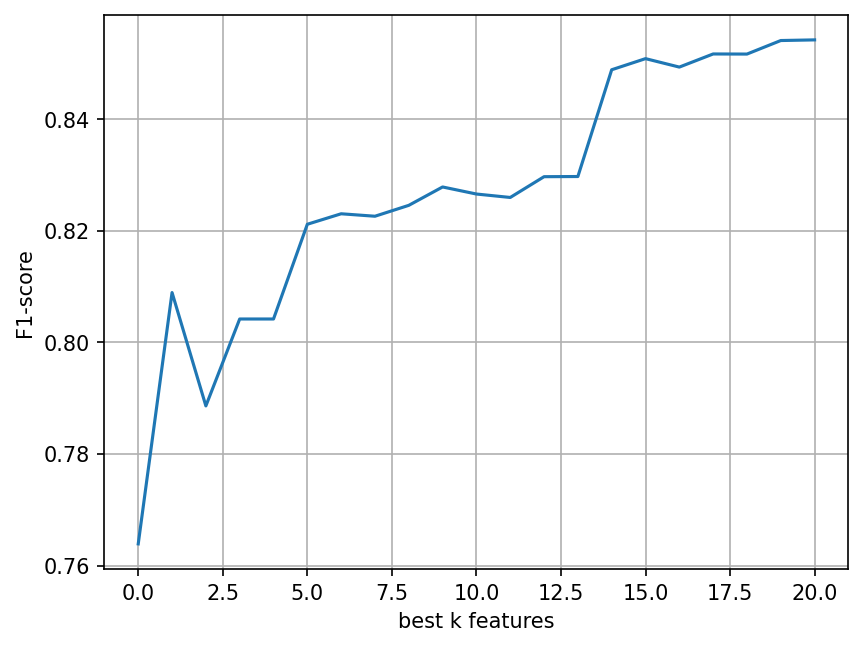

In [ ]:
# Finding the best K (optimal # of features out of 22 features in total) for feature selection
# Use f_classif. This computes the ANOVA F-value for the provided sample.

X = encoded_X_train_scaled
y = encoded_y_train

f1_list = []
for k in range(1, 22):
    bk = fs.SelectKBest(fs.f_classif, k = k)
    bk.fit(X, y)
    X_trans = bk.transform(X)
    train_x, test_x, train_y, test_y = train_test_split(X_trans,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    lr = LogisticRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    f1 = metrics.f1_score(test_y, y_pred)
    f1_list.append(f1)

print(len(f1_list))

fig, axe = plt.subplots(dpi = 150)

print(type(axe))

axe.plot(range(0, len(f1_list)), f1_list)
axe.set_xlabel("best k features")
axe.set_ylabel("F1-score")
plt.grid(True)
plt.show()

In [ ]:
# Feature selection, applying Select K Best to output the 14 most important features
# from sklearn.feature_selection import SelectKBest, f_classif

X = encoded_X_train_scaled
y = encoded_y_train

selector = SelectKBest(f_classif, k = 14)
selector.fit(X, y)
X_new = selector.transform(X)

features = (X.columns[selector.get_support(indices=True)])
features

Index(['Type of Travel', 'Class', 'Flight Distance', 'Check-in Service',
       'Online Boarding', 'On-board Service', 'Seat Comfort',
       'Leg Room Service', 'Cleanliness', 'Food and Drink',
       'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')

In [ ]:
selected_X_train = encoded_X_train_scaled[features]

In [ ]:
selected_X_train.head()

,Type of Travel,Class,Flight Distance,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,0.0,1.0,0.053668,0.4,0.6,0.8,0.8,0.8,0.6,0.6,0.8,0.8,0.8,0.75
1,0.0,0.0,0.223840,1.0,0.4,1.0,0.4,0.8,0.4,0.4,1.0,0.4,0.4,0.75
2,0.0,0.0,0.937702,0.8,0.4,0.8,0.4,0.8,0.4,1.0,0.8,0.6,0.8,0.75
3,0.0,0.0,0.891855,0.6,0.8,1.0,0.8,0.6,0.8,0.8,1.0,1.0,0.8,1.00
4,0.0,0.0,0.174757,0.6,1.0,1.0,0.8,0.8,0.6,1.0,1.0,0.6,1.0,1.00


In [ ]:
selected_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103589 entries, 0 to 103588
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type of Travel           103589 non-null  float64
 1   Class                    103589 non-null  float64
 2   Flight Distance          103589 non-null  float64
 3   Check-in Service         103589 non-null  float64
 4   Online Boarding          103589 non-null  float64
 5   On-board Service         103589 non-null  float64
 6   Seat Comfort             103589 non-null  float64
 7   Leg Room Service         103589 non-null  float64
 8   Cleanliness              103589 non-null  float64
 9   Food and Drink           103589 non-null  float64
 10  In-flight Service        103589 non-null  float64
 11  In-flight Wifi Service   103589 non-null  float64
 12  In-flight Entertainment  103589 non-null  float64
 13  Baggage Handling         103589 non-null  float64
dtypes: f

In [ ]:
print(type(selected_X_train))

<class 'pandas.core.frame.DataFrame'>


**Select the same 14 features with the Train set in test set to build models in the following process**

In [ ]:
selected_X_test = encoded_X_test[['Type of Travel', 'Class', 'Flight Distance', 'Check-in Service',
                                  'Online Boarding', 'On-board Service', 'Seat Comfort',
                                  'Leg Room Service', 'Cleanliness', 'Food and Drink',
                                  'In-flight Service', 'In-flight Wifi Service',
                                  'In-flight Entertainment', 'Baggage Handling']].copy()

In [ ]:
selected_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25898 entries, 43209 to 123640
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Type of Travel           25898 non-null  int64
 1   Class                    25898 non-null  int64
 2   Flight Distance          25898 non-null  int64
 3   Check-in Service         25898 non-null  int64
 4   Online Boarding          25898 non-null  int64
 5   On-board Service         25898 non-null  int64
 6   Seat Comfort             25898 non-null  int64
 7   Leg Room Service         25898 non-null  int64
 8   Cleanliness              25898 non-null  int64
 9   Food and Drink           25898 non-null  int64
 10  In-flight Service        25898 non-null  int64
 11  In-flight Wifi Service   25898 non-null  int64
 12  In-flight Entertainment  25898 non-null  int64
 13  Baggage Handling         25898 non-null  int64
dtypes: int64(14)
memory usage: 3.0 MB


In [ ]:
print(type(selected_X_test))

<class 'pandas.core.frame.DataFrame'>


**Applying undersampling, oversampling and SMOTE to address the imbalance in the target class, "Satisfaction".**

**Applying SMOTE**

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# define dataset
X_SMOTE = selected_X_train.copy()
y_SMOTE = encoded_y_train.copy()
# summarize class distribution
counter = Counter(y_SMOTE)
print('Before SMOTE',(counter))
# transform the dataset
smotesample = SMOTE()
X_SMOTE, y_SMOTE = smotesample.fit_resample(X_SMOTE, y_SMOTE)
# summarize the new class distribution
counter = Counter(y_SMOTE)
print('After SMOTE',(counter))

Before SMOTE Counter({'Satisfaction': 1})
After SMOTE Counter({'Satisfaction': 1})


In [ ]:
SMOTE_X_train = X_SMOTE.copy()

In [ ]:
SMOTE_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117374 entries, 0 to 117373
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type of Travel           117374 non-null  float64
 1   Class                    117374 non-null  float64
 2   Flight Distance          117374 non-null  float64
 3   Check-in Service         117374 non-null  float64
 4   Online Boarding          117374 non-null  float64
 5   On-board Service         117374 non-null  float64
 6   Seat Comfort             117374 non-null  float64
 7   Leg Room Service         117374 non-null  float64
 8   Cleanliness              117374 non-null  float64
 9   Food and Drink           117374 non-null  float64
 10  In-flight Service        117374 non-null  float64
 11  In-flight Wifi Service   117374 non-null  float64
 12  In-flight Entertainment  117374 non-null  float64
 13  Baggage Handling         117374 non-null  float64
dtypes: f

In [ ]:
SMOTE_y_train = y_SMOTE.copy()
SMOTE_y_train.value_counts()

Satisfaction
0               58687
1               58687
dtype: int64

**Applying undersampling**

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# define dataset
X_under = selected_X_train
y_under = encoded_y_train
# summarize class distribution
print('Before UnderSampling',(Counter(y_under)))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_under, y_under)
# summarize class distribution
print('After UnderSampling',(Counter(y_under)))

Before UnderSampling Counter({'Satisfaction': 1})
After UnderSampling Counter({'Satisfaction': 1})


In [ ]:
undersampling_X_train = X_under.copy()
undersampling_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89804 entries, 0 to 89803
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type of Travel           89804 non-null  float64
 1   Class                    89804 non-null  float64
 2   Flight Distance          89804 non-null  float64
 3   Check-in Service         89804 non-null  float64
 4   Online Boarding          89804 non-null  float64
 5   On-board Service         89804 non-null  float64
 6   Seat Comfort             89804 non-null  float64
 7   Leg Room Service         89804 non-null  float64
 8   Cleanliness              89804 non-null  float64
 9   Food and Drink           89804 non-null  float64
 10  In-flight Service        89804 non-null  float64
 11  In-flight Wifi Service   89804 non-null  float64
 12  In-flight Entertainment  89804 non-null  float64
 13  Baggage Handling         89804 non-null  float64
dtypes: float64(14)
memory 

In [ ]:
undersampling_y_train = y_under.copy()
undersampling_y_train.value_counts()

Satisfaction
0               44902
1               44902
dtype: int64

**Applying oversampling**

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# define dataset
X_over = selected_X_train
# y_over = y_train
y_over = encoded_y_train
# summarize class distribution
print('Before OverSampling',(Counter(y_over)))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_over, y_over)
# summarize class distribution
print('After OverSampling',(Counter(y_over)))

Before OverSampling Counter({'Satisfaction': 1})
After OverSampling Counter({'Satisfaction': 1})


In [ ]:
oversampling_X_train = X_over.copy()
oversampling_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117374 entries, 0 to 117373
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type of Travel           117374 non-null  float64
 1   Class                    117374 non-null  float64
 2   Flight Distance          117374 non-null  float64
 3   Check-in Service         117374 non-null  float64
 4   Online Boarding          117374 non-null  float64
 5   On-board Service         117374 non-null  float64
 6   Seat Comfort             117374 non-null  float64
 7   Leg Room Service         117374 non-null  float64
 8   Cleanliness              117374 non-null  float64
 9   Food and Drink           117374 non-null  float64
 10  In-flight Service        117374 non-null  float64
 11  In-flight Wifi Service   117374 non-null  float64
 12  In-flight Entertainment  117374 non-null  float64
 13  Baggage Handling         117374 non-null  float64
dtypes: f

In [ ]:
oversampling_y_train = y_over.copy()
oversampling_y_train.value_counts()

Satisfaction
0               58687
1               58687
dtype: int64

# **Building Models**

**Apply Random Forest, k-Nearest Neighbours, and Gradient Boosting (Extreme Gradient Boosting (XGBoost))**

**Random Forest: SMOTE**

In [ ]:
RF = RandomForestClassifier(max_features=14, max_depth=7) # set parameter randomly

In [ ]:
RF.fit(SMOTE_X_train, SMOTE_y_train)
RF.score(SMOTE_X_train, SMOTE_y_train)

0.9296863019067255

**Random Forest: undersampling**

In [ ]:
RF.fit(undersampling_X_train, undersampling_y_train)
RF.score(undersampling_X_train, undersampling_y_train)

0.9264620729588883

**Random Forest: oversampling**

In [ ]:
RF.fit(oversampling_X_train, oversampling_y_train)
RF.score(oversampling_X_train, oversampling_y_train)

0.9270281322950569

**Comparing the scores**

In [ ]:
score_RF = [["SMOTE", 92.9], ["undersampling", 92.6], ["oversampling", 92.7]]

# define header name
cols_names = ["Method", "Score"]

# display table
print(tabulate(score_RF, headers=cols_names, tablefmt="fancy_grid"))

╒═══════════════╤═════════╕
│ Method        │   Score │
╞═══════════════╪═════════╡
│ SMOTE         │    92.9 │
├───────────────┼─────────┤
│ undersampling │    92.6 │
├───────────────┼─────────┤
│ oversampling  │    92.7 │
╘═══════════════╧═════════╛


**Observations**: Random Forest: SMOTE is the highest score, 93.0 but there is no significant difference.

In [ ]:
# fit the model using the training data
RF = RandomForestClassifier(max_features= 14,  max_depth=7)
RF.fit(SMOTE_X_train , SMOTE_y_train)

# use model to make predictions on test data
y_pred_RF = (RF.predict(selected_X_test))
y_pred_RF

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Printing actuals and predictions
print('Actuals:\t\t', list(encoded_y_test))
print('Predictions with RF model:\t', list(y_pred_RF))

Actuals:		 ['Satisfaction']
Predictions with RF model:	 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
# confution matrix of RF
cnf_matrix_RF = metrics.confusion_matrix(encoded_y_test, y_pred_RF)
cnf_matrix_RF

array([[    1, 14537],
       [    0, 11360]])

In [ ]:
# classification report - RF
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     14538
           1       0.44      1.00      0.61     11360

    accuracy                           0.44     25898
   macro avg       0.72      0.50      0.30     25898
weighted avg       0.75      0.44      0.27     25898



**Checking the important features using Random Forest: SMOTE**

In [ ]:
# RF_SMOTE_X_train = SMOTE_X_train.copy()
# RF_SMOTE_y_train = SMOTE_y_train.copy()

# def f_importances(coef, names, top=-1):
#     imp = coef
#     imp, names = zip(*sorted(list(zip(imp, names))))

#     if top == -1:
#         top = len(names)

#     plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
#     plt.yticks(range(top), names[::-1][0:top])
#     plt.title('feature importances for Random Forest: SMOTE')
#     plt.show()

# features_names = RF_SMOTE_X_train.columns

# rf = RandomForestClassifier(n_estimators=14 , max_depth=7 , min_samples_split=25 , max_features=4, random_state=0)
# rf.fit(RF_SMOTE_X_train , RF_SMOTE_y_train)
# f_importances(abs(rf.feature_importances_), features_names, top=7)

**KNN: SMOTE**

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5) # 5 is default

In [ ]:
KNN.fit(SMOTE_X_train, SMOTE_y_train)
KNN.score(SMOTE_X_train, SMOTE_y_train)

0.9561657607306558

**KNN: undersampling**

In [ ]:
KNN.fit(undersampling_X_train, undersampling_y_train)
KNN.score(undersampling_X_train, undersampling_y_train)

0.945058126586789

**KNN: oversampling**

In [ ]:
KNN.fit(oversampling_X_train, oversampling_y_train)
KNN.score(oversampling_X_train, oversampling_y_train)

0.9514287661662719

**Comparing the scores**

In [ ]:
score_KNN = [["SMOTE", 95.6], ["undersampling", 94.5], ["oversampling", 95.1]]

# define header name
cols_names = ["Method", "Score"]

# display table
print(tabulate(score_KNN, headers=cols_names, tablefmt="fancy_grid"))

╒═══════════════╤═════════╕
│ Method        │   Score │
╞═══════════════╪═════════╡
│ SMOTE         │    95.6 │
├───────────────┼─────────┤
│ undersampling │    94.5 │
├───────────────┼─────────┤
│ oversampling  │    95.1 │
╘═══════════════╧═════════╛


**Observations**: KNN: SMOTE is the highest score, 95.6 but there is no significant difference.

In [ ]:
# fit the model using the training data
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(SMOTE_X_train , SMOTE_y_train)

# use model to make predictions on test data
y_pred_KNN = KNN.predict(selected_X_test)
y_pred_KNN

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Printing actuals and predictions
print('Actuals:\t\t', list(encoded_y_test))
print('Predictions with KNN model:\t', list(y_pred_KNN))

Actuals:		 ['Satisfaction']
Predictions with KNN model:	 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# confution matrix of KNN
cnf_matrix_KNN = metrics.confusion_matrix(encoded_y_test, y_pred_KNN)
cnf_matrix_KNN

array([[    3, 14535],
       [    2, 11358]])

In [ ]:
# accuracy score - KNN
# accuracy_score(y_test_KNN,y_pred_KNN)

# classification report - KNN
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.60      0.00      0.00     14538
           1       0.44      1.00      0.61     11360

    accuracy                           0.44     25898
   macro avg       0.52      0.50      0.31     25898
weighted avg       0.53      0.44      0.27     25898



**Checking the important features using KNN: SMOTE**

In [ ]:
# KNN_SMOTE_X_train = SMOTE_X_train.copy()
# KNN_SMOTE_y_train = SMOTE_y_train.copy()

# def f_importances(coef, names, top=-1):
#     imp = coef
#     imp, names = zip(*sorted(list(zip(imp, names))))

#     if top == -1:
#         top = len(names)

#     plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
#     plt.yticks(range(top), names[::-1][0:top])
#     plt.title('feature importances for KNN: SMOTE ')
#     plt.show()

# features_names = KNN_SMOTE_X_train.columns

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(KNN_SMOTE_X_train , KNN_SMOTE_y_train)
# f_importances(abs(rf.feature_importances_), features_names, top=8)

**XGBoost: SMOTE**

In [ ]:
XGB = GradientBoostingClassifier(max_depth=3) # 3 is default

In [ ]:
XGB.fit(SMOTE_X_train, SMOTE_y_train)
XGB.score(SMOTE_X_train, SMOTE_y_train)

0.9344658953430913

**XGBoost: undersampling**

In [ ]:
XGB.fit(undersampling_X_train, undersampling_y_train)
XGB.score(undersampling_X_train, undersampling_y_train)

0.9308939468175137

**XGBoost: oversampling**

In [ ]:
XGB.fit(oversampling_X_train, oversampling_y_train)
XGB.score(oversampling_X_train, oversampling_y_train)

0.9306745957367049

**Comparing the scores**

In [ ]:
score_XGBoost = [["SMOTE", 93.4], ["undersampling", 93.0], ["oversampling", 93.0]]

# define header name
cols_names = ["Method", "Score"]

# display table
print(tabulate(score_XGBoost, headers=cols_names, tablefmt="fancy_grid"))

╒═══════════════╤═════════╕
│ Method        │   Score │
╞═══════════════╪═════════╡
│ SMOTE         │    93.4 │
├───────────────┼─────────┤
│ undersampling │    93   │
├───────────────┼─────────┤
│ oversampling  │    93   │
╘═══════════════╧═════════╛


**Observations**: XGBoost: SMOTE = Highest score, 96.5 but but there is no significant difference.

In [ ]:
# fit the model using the training data
XGB = XGBClassifier(max_depth = 6)
XGB.fit(SMOTE_X_train, SMOTE_y_train)

# use model to make predictions on test data
y_pred_XGB = XGB.predict(selected_X_test)
y_pred_XGB

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Printing actuals and predictions
print('Actuals:\t\t', list(encoded_y_test))
print('Predictions with XGB model:\t', list(y_pred_XGB))

Actuals:		 ['Satisfaction']
Predictions with XGB model:	 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# confution matrix of KGB
cnf_matrix_XGB = metrics.confusion_matrix(encoded_y_test, y_pred_KNN)
cnf_matrix_XGB

array([[    3, 14535],
       [    2, 11358]])

In [ ]:
# classification report - KNN
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14538
           1       0.44      1.00      0.61     11360

    accuracy                           0.44     25898
   macro avg       0.22      0.50      0.30     25898
weighted avg       0.19      0.44      0.27     25898



**Checking the important features using XGBoost: oversampling**

In [ ]:
# XGB_SMOTE_X_train = SMOTE_X_train.copy()
# XGB_SMOTE_y_train = SMOTE_y_train.copy()

# def f_importances(coef, names, top=-1):
#     imp = coef
#     imp, names = zip(*sorted(list(zip(imp, names))))

#     if top == -1:
#         top = len(names)

#     plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
#     plt.yticks(range(top), names[::-1][0:top])
#     plt.title('feature importances for XGBoost: SMOTE')
#     plt.show()

# features_names = XGB_SMOTE_X_train.columns

# xgb = XGBClassifier(max_depth = 6)
# xgb.fit(XGB_SMOTE_X_train, XGB_SMOTE_y_train)
# f_importances(abs(rf.feature_importances_), features_names, top=8)

**Based on score, this project selected SMOTE dataset and find the optimal parameters for given models**

In [ ]:
# Model activation and result plot function

def get_model_metrics(model, SMOTE_X_train, selected_X_test, SMOTE_y_train, encoded_y_test):

    '''
    Model activation function, takes in model as a parameter and returns metrics as specified.

    Inputs:
        model, SMOTE_X_train, selected_X_test, SMOTE_y_train, encoded_y_test
    Output:
        Model output metrics, confusion matrix, ROC AUC curve
    '''

    # Mark of current time when model began running
    t0 = time.time()

    # Fit the model on the training data and run predictions on test data
    model.fit(SMOTE_X_train,  SMOTE_y_train)
    y_pred = model.predict(selected_X_test)
    y_pred_proba = model.predict_proba(selected_X_test)[:,1]
    ConfusionMatrix = confusion_matrix(encoded_y_test, y_pred, labels = model.classes_)
    # Obtain training accuracy as a comparative metric using Sklearn's metrics package
    train_score = model.score(SMOTE_X_train,  SMOTE_y_train)
    # Obtain testing accuracy as a comparative metric using Sklearn's metrics package
    accuracy = accuracy_score(encoded_y_test, y_pred)
    # Obtain precision from predictions using Sklearn's metrics package
    precision = precision_score(encoded_y_test, y_pred)
    # Obtain recall from predictions using Sklearn's metrics package
    recall = recall_score(encoded_y_test, y_pred)
    # Obtain f1 from predictions using Sklearn's metrics package
    f1 = f1_score(encoded_y_test, y_pred)
    # Obtain ROC score from predictions using Sklearn's metrics package
    roc = roc_auc_score(encoded_y_test, y_pred_proba)
    # Obtain the time taken used to run the model, by subtracting the start time from the current time
    time_taken = time.time() - t0
    # Obtain the resources consumed in running the model
    memory_used = int(getrusage(RUSAGE_SELF).ru_maxrss / 1024)

    # Outputting the metrics of the model performance
    print("Accuracy on Training = {}".format(train_score))
    print("Accuracy on Test = {} • Precision = {}".format(accuracy, precision))
    print("Recall = {} • ROC Area under Curve = {}".format(recall, roc))
    print("F1 = {} • ROC Area under Curve = {}".format(f1, roc))
    print("Time taken = {} seconds • Memory consumed = {} Bytes".format(time_taken, memory_used))

    # Plotting the confusion matrix of the model's predictive capabilities
    dis = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels= model.classes_)
    # dis = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels= ['Dissatisfied', 'Satisfied'])
    # Plotting the ROC AUC curve of the model
    fpr, tpr, _ = metrics.roc_curve(encoded_y_test,  y_pred_proba)
    # create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    dis.plot()
    plt.show()


    return model, train_score, accuracy, precision, recall, f1, roc, time_taken, memory_used

**Parameters for Random Forest**

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Performing GridSearchCV to obtain optimal model parameters**

In [ ]:
%%time
clf = RandomForestClassifier()

params = { 'max_depth': [5, 10, 15, 20],
           'max_leaf_nodes': [10, 20, 30, 40],
           'min_samples_split': [1, 2, 3, 4]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

rscv = GridSearchCV(estimator = clf,
                    param_grid = params,
                    scoring = acc_scorer,
                    cv = None,
                    n_jobs = -1,
                    verbose = 1)
rscv.fit(SMOTE_X_train,  SMOTE_y_train)
rscv.predict(selected_X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'max_depth': 10, 'max_leaf_nodes': 40, 'min_samples_split': 3}
CPU times: user 18.5 s, sys: 2.16 s, total: 20.7 s
Wall time: 17min 8s


**Running model pipeline and obtaining performance metrics - Random Forest**

Accuracy on Training = 0.9217969908156832
Accuracy on Test = 0.43953201019383736 • Precision = 0.43815908110862833
Recall = 0.9838908450704226 • ROC Area under Curve = 0.7789136144421903
F1 = 0.6063088231305432 • ROC Area under Curve = 0.7789136144421903
Time taken = 8.818878889083862 seconds • Memory consumed = 667 Bytes


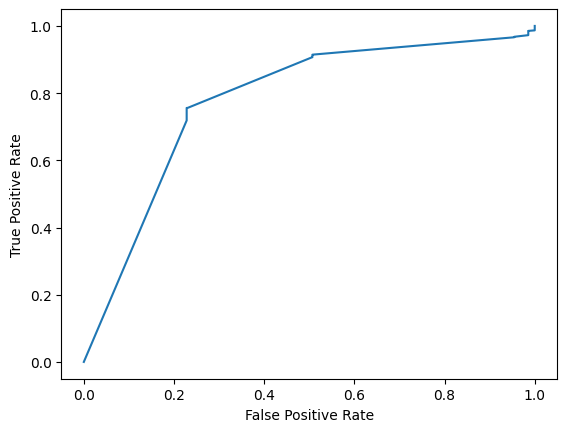

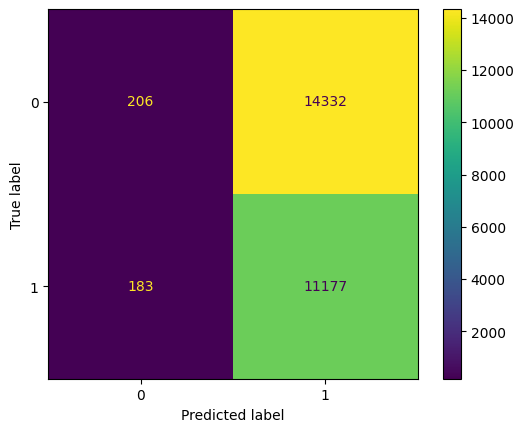

In [ ]:
model_rf = RandomForestClassifier(**params)
model_rf, train_rf, accuracy_rf, precision_rf, recall_rf, f1_rf, roc_rf, tt_rf, mu_rf = get_model_metrics(model_rf, SMOTE_X_train, selected_X_test, SMOTE_y_train, encoded_y_test)

**Parameters for KNN**

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Performing GridSearchCV to obtain optimal model parameters**

In [ ]:
%%time
clf = KNeighborsClassifier()

params = { 'n_neighbors': [5, 10, 15, 25]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

rscv = GridSearchCV(estimator = clf,
                    param_grid = params,
                    scoring = acc_scorer,
                    cv = None,
                    n_jobs = -1,
                    verbose = 1)
rscv.fit(SMOTE_X_train,  SMOTE_y_train)
rscv.predict(selected_X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'n_neighbors': 5}
CPU times: user 21 s, sys: 987 ms, total: 22 s
Wall time: 8min 16s


**Running model pipeline and obtaining performance metrics - KNN**

Accuracy on Training = 0.9223422563770511
Accuracy on Test = 0.43984091435632094 • Precision = 0.4383352274953952
Recall = 0.9845950704225352 • ROC Area under Curve = 0.7850315479685099
F1 = 0.6066111668519674 • ROC Area under Curve = 0.7850315479685099
Time taken = 9.124082088470459 seconds • Memory consumed = 674 Bytes


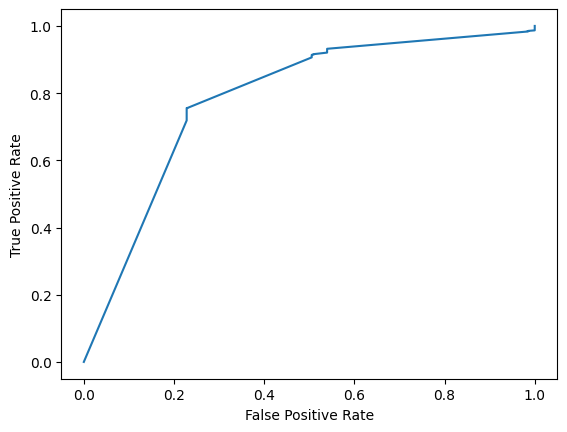

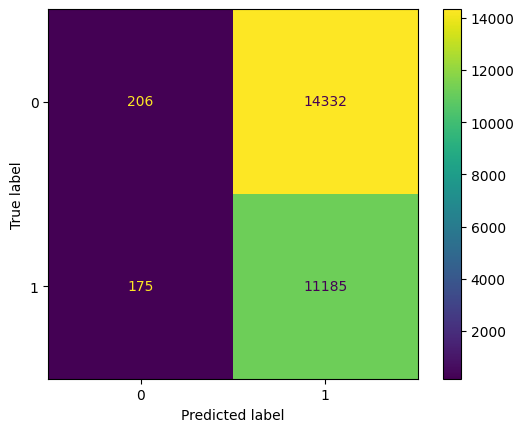

In [ ]:
model_KNN = KNeighborsClassifier(**params)
model_KNN, train_KNN, accuracy_KNN, precision_KNN, recall_KNN, f1_KNN, roc_KNN, tt_KNN, mu_KNN = get_model_metrics(model_rf, SMOTE_X_train, selected_X_test, SMOTE_y_train, encoded_y_test)

**Parameters for XGBoost**

In [ ]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

**Performing GridSearchCV to obtain optimal model parameters**

In [ ]:
%%time
clf = XGBClassifier()


params = { 'max_depth': [3, 5, 6],
           'learning_rate': [0.01, 0.1],
           'n_estimators': [100, 500]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

rscv = GridSearchCV(estimator = clf,
                    param_grid = params,
                    scoring = acc_scorer,
                    cv = None,
                    n_jobs = -1,
                    verbose = 1)
rscv.fit(SMOTE_X_train,  SMOTE_y_train)
rscv.predict(selected_X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
CPU times: user 2min 8s, sys: 2.7 s, total: 2min 11s
Wall time: 24min 38s


**Running model pipeline and obtaining performance metrics - XGBoost**

Accuracy on Training = 0.9208086969857038
Accuracy on Test = 0.43953201019383736 • Precision = 0.43815908110862833
Recall = 0.9838908450704226 • ROC Area under Curve = 0.7885537585812025
F1 = 0.6063088231305432 • ROC Area under Curve = 0.7885537585812025
Time taken = 9.007696628570557 seconds • Memory consumed = 684 Bytes


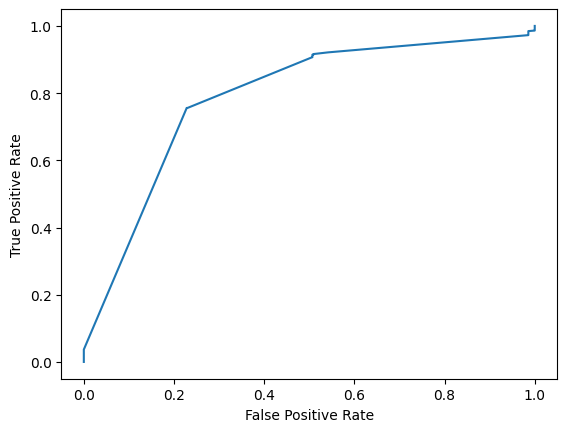

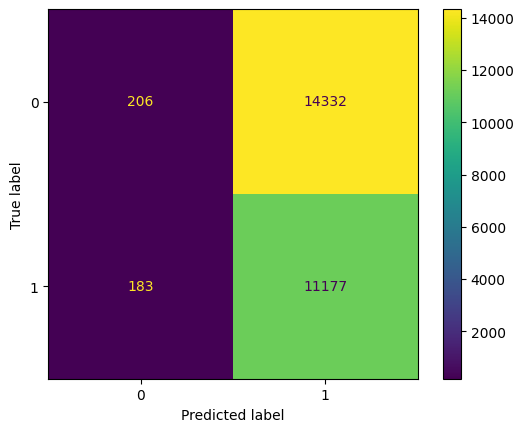

In [ ]:
model_XGB = XGBClassifier(**params)
model_XGB, train_XGB, accuracy_XGB, precision_XGB, recall_XGB, f1_XGB, roc_XGB, tt_XGB, mu_XGB = get_model_metrics(model_rf, SMOTE_X_train, selected_X_test, SMOTE_y_train, encoded_y_test)

**Comparing output performance of the model pipelines**

In [ ]:
# Collecting model data
training_scores = [train_rf, train_KNN, train_XGB]
accuracy = [accuracy_rf, accuracy_KNN, accuracy_XGB]
precision = [precision_rf, precision_KNN, precision_XGB]
recall = [recall_rf, recall_KNN, recall_XGB]
f1_scores = [f1_rf, f1_KNN, f1_XGB]
roc_scores = [roc_rf, roc_KNN, roc_XGB]
time_scores = [tt_rf, tt_KNN, tt_XGB]
memory_scores = [mu_rf, mu_KNN, mu_XGB]

model_data = {'Model': ['Random Forest', 'KNN', 'XGBoost'],
            'Accuracy on Training' : training_scores,
            'Accuracy on Test' : accuracy,
            'Precision' : precision,
            'Recall' : recall,
            'F1' : f1_scores,
            'ROC AUC Score' : roc_scores,
            'Time Elapsed (seconds)' : time_scores,
            'Memory Consumed (bytes)': memory_scores}

model_data = pd.DataFrame(model_data)
model_data

,Model,Accuracy on Training,Accuracy on Test,Precision,Recall,F1,ROC AUC Score,Time Elapsed (seconds),Memory Consumed (bytes)
0,Random Forest,0.921797,0.439532,0.438159,0.983891,0.606309,0.778914,8.818879,667
1,KNN,0.922342,0.439841,0.438335,0.984595,0.606611,0.785032,9.124082,674
2,XGBoost,0.920809,0.439532,0.438159,0.983891,0.606309,0.788554,9.007697,684


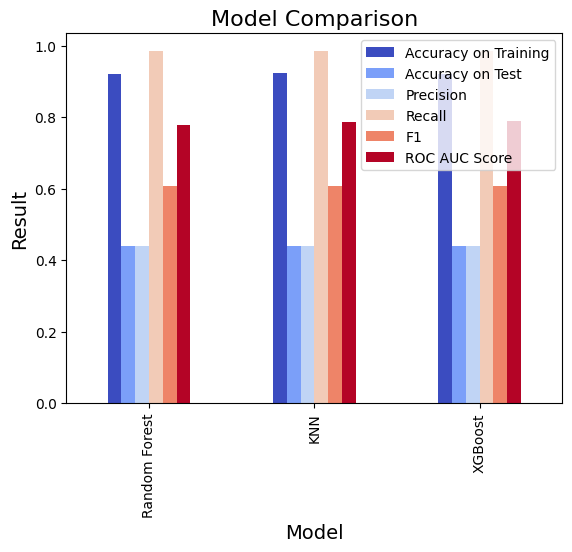

In [ ]:
# Plotting each model's performance scores vs time elapsed
# plt.rcParams["figure.figsize"] = (15,10)

ax1 = model_data.plot.bar(x = 'Model', y = ["Accuracy on Training", "Accuracy on Test", "Precision", "Recall",
                                           "F1", "ROC AUC Score"],
                          cmap = 'coolwarm')
ax1.legend()

ax1.set_title("Model Comparison", fontsize = 16)
ax1.set_xlabel('Model', fontsize = 14)
ax1.set_ylabel('Result', fontsize = 14, color = 'Black');

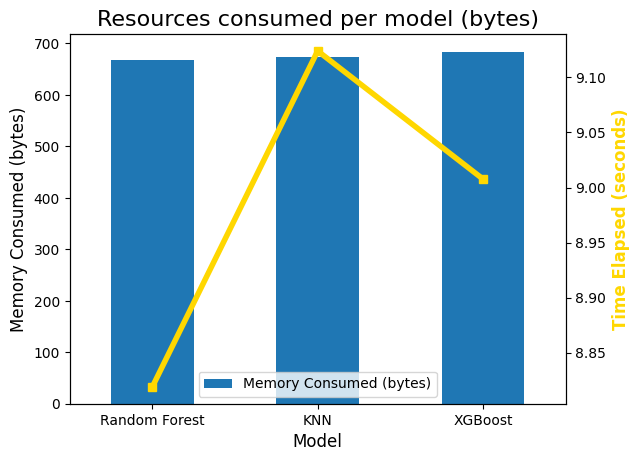

In [ ]:
# Plotting each model's memory consumption
ax1 = model_data.plot.bar(x = 'Model', y = 'Memory Consumed (bytes)')

ax1.set_title("Resources consumed per model (bytes)", fontsize = 16)
ax2 = model_data['Time Elapsed (seconds)'].plot(secondary_y = True, color = 'Gold', linewidth = 4, marker = 's')
ax1.set_xlabel('Model', fontsize = 12)
ax2.set_ylabel('Time Elapsed (seconds)', fontsize = 12, color = 'Gold', fontweight = 'bold')
ax1.set_ylabel('Memory Consumed (bytes)', fontsize = 12, color = 'Black');

**Feature importance of finalist pipeline - Random Forest**

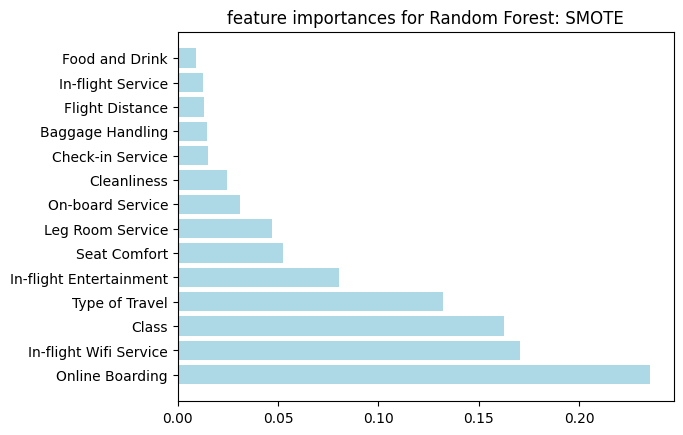

In [ ]:
RF_SMOTE_X_train = SMOTE_X_train.copy()
RF_SMOTE_y_train = SMOTE_y_train.copy()

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'LightBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Random Forest: SMOTE')
    plt.show()

features_names = RF_SMOTE_X_train.columns

rf = RandomForestClassifier(max_depth=10 , max_leaf_nodes=40, min_samples_split=3, random_state=0)
rf.fit(RF_SMOTE_X_train , RF_SMOTE_y_train)
f_importances(abs(rf.feature_importances_), features_names)

# **Unsupervised Machine Learning - Association Rules**

## **Data preparation for Association Rules**

In [ ]:
df1.shape

(129880, 23)

In [ ]:
# Checking % of missing values
percent_missing = df1['Arrival Delay'].isnull().sum() * 100 / len(df1['Arrival Delay'])
percent_missing

0.3025870033877425

In [ ]:
# Missing value ratio is only 0.3%. Therefore, I will remove missing values before splitting dataset
AR_df = df1.copy()
AR_df = AR_df.dropna(how='any',axis=0)
AR_df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [ ]:
# check the # of entries after removing missing values
row_count = len(AR_df.index)
row_count

129487

**Apply Quantile-cut (qcut) for Age, Flight Distance, Departure Delay and Arrival Delay.**

In [ ]:
AR_df['Age_qcut'] = pd.qcut(AR_df.Age, q=5)
AR_df['Age_qcut'].head()

ID
1    (44.0, 54.0]
2    (25.0, 36.0]
3    (36.0, 44.0]
4    (44.0, 54.0]
5    (44.0, 54.0]
Name: Age_qcut, dtype: category
Categories (5, interval[float64, right]): [(6.999, 25.0] < (25.0, 36.0] < (36.0, 44.0] <
                                           (44.0, 54.0] < (54.0, 85.0]]

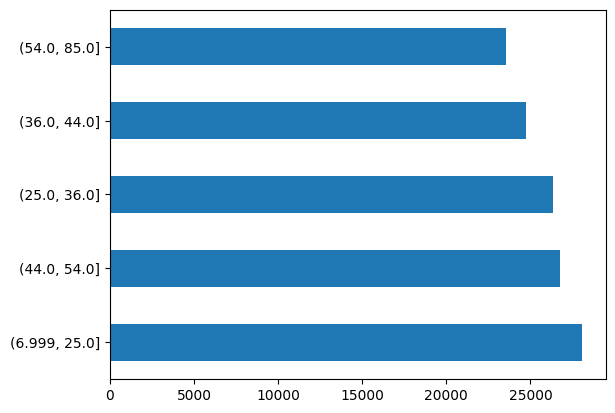

(6.999, 25.0]    28089
(44.0, 54.0]     26757
(25.0, 36.0]     26346
(36.0, 44.0]     24757
(54.0, 85.0]     23538
Name: Age, dtype: int64

In [ ]:
AR_df['Age_qcut'].value_counts().plot(kind='barh')
plt.show()

qcut_series, qcut_intervals = pd.qcut(AR_df.Age, q=5, retbins=True)

qcut_series.value_counts()

In [ ]:
AR_df['Flight Distance_qcut'] = pd.qcut(AR_df["Flight Distance"], q=5)
AR_df['Flight Distance_qcut'].head()

ID
1     (631.0, 1050.0]
2     (631.0, 1050.0]
3     (631.0, 1050.0]
4    (1050.0, 2072.0]
5    (2072.0, 4983.0]
Name: Flight Distance_qcut, dtype: category
Categories (5, interval[float64, right]): [(30.999, 358.0] < (358.0, 631.0] < (631.0, 1050.0] <
                                           (1050.0, 2072.0] < (2072.0, 4983.0]]

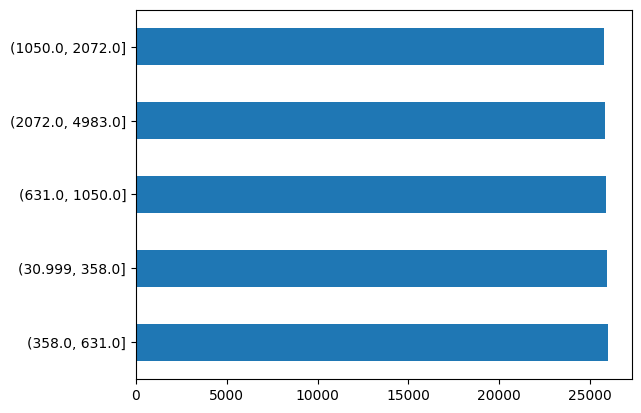

(358.0, 631.0]      26021
(30.999, 358.0]     25955
(631.0, 1050.0]     25899
(2072.0, 4983.0]    25850
(1050.0, 2072.0]    25762
Name: Flight Distance, dtype: int64

In [ ]:
AR_df['Flight Distance_qcut'].value_counts().plot(kind='barh')
plt.show()

qcut_series, qcut_intervals = pd.qcut(AR_df["Flight Distance"], q=5, retbins=True)

qcut_series.value_counts()

In [ ]:
AR_df['Departure Delay_qcut'] = pd.qcut(AR_df["Departure Delay"].rank(method='first'), q=5)
AR_df['Departure Delay_qcut'].head()

ID
1      (51795.4, 77692.6]
2    (103589.8, 129487.0]
3        (0.999, 25898.2]
4        (0.999, 25898.2]
5        (0.999, 25898.2]
Name: Departure Delay_qcut, dtype: category
Categories (5, interval[float64, right]): [(0.999, 25898.2] < (25898.2, 51795.4] <
                                           (51795.4, 77692.6] < (77692.6, 103589.8] <
                                           (103589.8, 129487.0]]

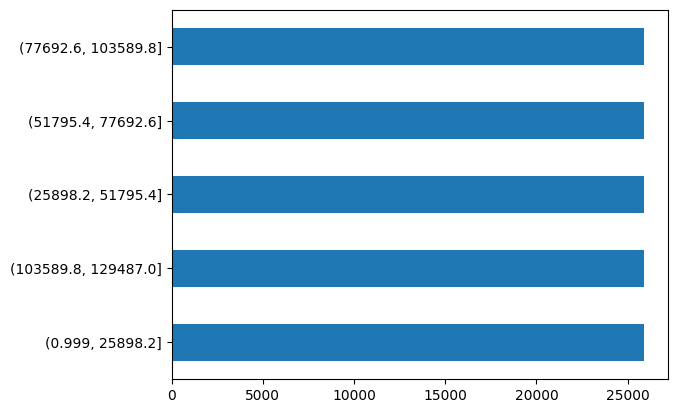

(0.999, 25898.2]        25898
(103589.8, 129487.0]    25898
(25898.2, 51795.4]      25897
(51795.4, 77692.6]      25897
(77692.6, 103589.8]     25897
Name: Departure Delay, dtype: int64

In [ ]:
AR_df['Departure Delay_qcut'].value_counts().plot(kind='barh')
plt.show()

qcut_series, qcut_intervals = pd.qcut(AR_df["Departure Delay"].rank(method='first'), q=5, retbins=True)

qcut_series.value_counts()

In [ ]:
AR_df['Arrival Delay_qcut'] = pd.qcut(AR_df["Arrival Delay"].rank(method='first'), q=5)
AR_df['Arrival Delay_qcut'].head()

ID
1     (77692.6, 103589.8]
2    (103589.8, 129487.0]
3        (0.999, 25898.2]
4        (0.999, 25898.2]
5      (51795.4, 77692.6]
Name: Arrival Delay_qcut, dtype: category
Categories (5, interval[float64, right]): [(0.999, 25898.2] < (25898.2, 51795.4] <
                                           (51795.4, 77692.6] < (77692.6, 103589.8] <
                                           (103589.8, 129487.0]]

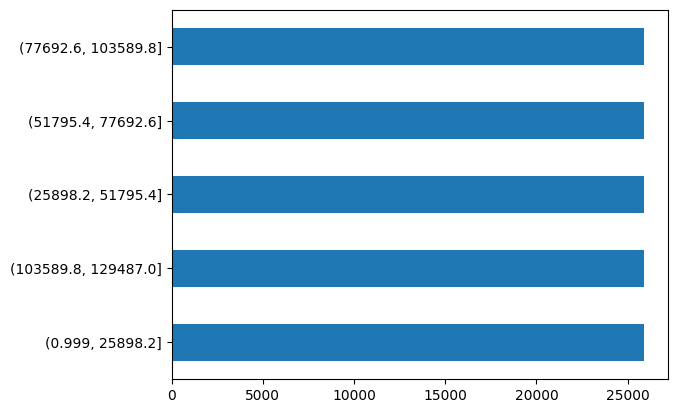

(0.999, 25898.2]        25898
(103589.8, 129487.0]    25898
(25898.2, 51795.4]      25897
(51795.4, 77692.6]      25897
(77692.6, 103589.8]     25897
Name: Arrival Delay, dtype: int64

In [ ]:
AR_df['Arrival Delay_qcut'].value_counts().plot(kind='barh')
plt.show()

qcut_series, qcut_intervals = pd.qcut(AR_df["Arrival Delay"].rank(method='first'), q=5, retbins=True)

qcut_series.value_counts()

In [ ]:
columns = ['Satisfaction',
          'Gender',
          'Age_qcut',
          'Customer Type',
          'Type of Travel',
          'Class',
          'Flight Distance_qcut',
          'Departure Delay_qcut',
          'Arrival Delay_qcut',
          'Departure and Arrival Time Convenience',
          'Ease of Online Booking',
          'Check-in Service',
          'Online Boarding',
          'Gate Location',
          'On-board Service',
          'Seat Comfort',
          'Leg Room Service',
          'Cleanliness',
          'Food and Drink',
          'In-flight Service',
          'In-flight Wifi Service',
          'In-flight Entertainment',
          'Baggage Handling']

not_used_columns = list(set(AR_df.columns.to_list()) - set(columns))

In [ ]:
AR_df = pd.get_dummies(AR_df, columns=columns)

In [ ]:
AR_df.drop(labels=not_used_columns, axis=1, inplace=True)

In [ ]:
AR_df.head()

,Satisfaction_Neutral or Dissatisfied,Satisfaction_Satisfied,Gender_Female,Gender_Male,"Age_qcut_(6.999, 25.0]","Age_qcut_(25.0, 36.0]","Age_qcut_(36.0, 44.0]","Age_qcut_(44.0, 54.0]","Age_qcut_(54.0, 85.0]",Customer Type_First-time,...,In-flight Entertainment_1,In-flight Entertainment_2,In-flight Entertainment_3,In-flight Entertainment_4,In-flight Entertainment_5,Baggage Handling_1,Baggage Handling_2,Baggage Handling_3,Baggage Handling_4,Baggage Handling_5
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
AR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 1 to 129880
Columns: 114 entries, Satisfaction_Neutral or Dissatisfied to Baggage Handling_5
dtypes: uint8(114)
memory usage: 15.1 MB


In [ ]:
# iterating the columns
for col in AR_df.columns:
    print(col)

In [ ]:
len(AR_df.columns)

114

**Exploratory Data Analysis (EDA) using pandas-profiling after catagorizing dataset**

In [ ]:
pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(AR_df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Apply Apriori algorithm**

In [ ]:
AR_AP = AR_df.copy()

In [ ]:
AR_AP['Satisfaction_Satisfied'].value_counts()

0    73225
1    56262
Name: Satisfaction_Satisfied, dtype: int64

In [ ]:
'''
Filtering only consequents with Satisfaction_Satisfied
'''

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(AR_AP, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'Satisfaction_Satisfied\'}'

# results_Satisfaction_Satisfied = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_Satisfaction_Satisfied = rules[rules['consequents'].astype(str).str.contains(target, na=False)]


results_Satisfaction_Satisfied.nlargest(n = 10, columns = 'support')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
92,(Type of Travel_Business),(Satisfaction_Satisfied),0.690764,0.434499,0.403183,0.583677,1.343333,0.103047,1.358323,0.826499
90,(Customer Type_Returning),(Satisfaction_Satisfied),0.816862,0.434499,0.390572,0.478137,1.100433,0.035646,1.083620,0.498348
1004,"(Type of Travel_Business, Customer Type_Return...",(Satisfaction_Satisfied),0.509163,0.434499,0.359488,0.706037,1.624944,0.138257,1.923712,0.783547
94,(Class_Business),(Satisfaction_Satisfied),0.478735,0.434499,0.332466,0.694467,1.598316,0.124456,1.850866,0.718141
1148,"(Class_Business, Type of Travel_Business)",(Satisfaction_Satisfied),0.458154,0.434499,0.330049,0.720388,1.657972,0.130981,2.022446,0.732411
1010,"(Class_Business, Customer Type_Returning)",(Satisfaction_Satisfied),0.407608,0.434499,0.304239,0.746400,1.717840,0.127133,2.229894,0.705401
3318,"(Class_Business, Customer Type_Returning, Type...",(Satisfaction_Satisfied),0.387128,0.434499,0.301822,0.779644,1.794351,0.133615,2.566307,0.722329
84,(Gender_Male),(Satisfaction_Satisfied),0.492590,0.434499,0.216879,0.440283,1.013311,0.002849,1.010333,0.025889
966,"(Gender_Female, Type of Travel_Business)",(Satisfaction_Satisfied),0.352630,0.434499,0.201889,0.572524,1.317663,0.048672,1.322882,0.372400
980,"(Type of Travel_Business, Gender_Male)",(Satisfaction_Satisfied),0.338134,0.434499,0.201294,0.595309,1.370103,0.054375,1.397364,0.408131


In [ ]:
results_Satisfaction_Satisfied.nlargest(n = 10, columns = 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3402,"(Type of Travel_Business, Customer Type_Return...",(Satisfaction_Satisfied),0.147343,0.434499,0.147289,0.999633,2.300656,0.083269,1541.312779,0.663035
3374,"(Type of Travel_Business, Customer Type_Return...",(Satisfaction_Satisfied),0.102651,0.434499,0.102582,0.999323,2.299942,0.057980,835.181824,0.629863
4172,"(Class_Business, Online Boarding_5, Type of Tr...",(Satisfaction_Satisfied),0.138076,0.434499,0.137442,0.995414,2.290945,0.077449,123.299860,0.653768
3626,"(Type of Travel_Business, Customer Type_Return...",(Satisfaction_Satisfied),0.135473,0.434499,0.134670,0.994071,2.287855,0.075807,95.384757,0.651118
3461,"(Type of Travel_Business, Customer Type_Return...",(Satisfaction_Satisfied),0.151691,0.434499,0.150695,0.993432,2.286385,0.084785,86.105166,0.663235
3570,"(In-flight Service_5, Type of Travel_Business,...",(Satisfaction_Satisfied),0.134863,0.434499,0.133967,0.993357,2.286212,0.075369,85.132243,0.650296
3514,"(Type of Travel_Business, Customer Type_Return...",(Satisfaction_Satisfied),0.119680,0.434499,0.118599,0.990966,2.280708,0.066598,62.596897,0.637881
136,(In-flight Wifi Service_5),(Satisfaction_Satisfied),0.110467,0.434499,0.109378,0.990143,2.278813,0.061380,57.368250,0.630865
3598,"(Customer Type_Returning, Type of Travel_Busin...",(Satisfaction_Satisfied),0.144524,0.434499,0.142632,0.986908,2.271369,0.079836,43.195027,0.654299
1184,"(Type of Travel_Business, Online Boarding_5)",(Satisfaction_Satisfied),0.165839,0.434499,0.163584,0.986402,2.270205,0.091527,41.587547,0.670747


In [ ]:
'''
Filtering only consequents with Satisfaction_Neutral or Dissatisfied
'''

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(AR_AP, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'Satisfaction_Neutral or Dissatisfied\'}'

# results_Satisfaction_Neutral_or_Dissatisfied = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_Satisfaction_Neutral_or_Dissatisfied = rules[rules['consequents'].astype(str).str.contains(target, na=False)]

results_Satisfaction_Neutral_or_Dissatisfied.nlargest(n = 10, columns = 'support')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(Class_Economy),(Satisfaction_Neutral or Dissatisfied),0.448825,0.565501,0.364631,0.812413,1.436626,0.110820,2.316253,0.551412
1,(Gender_Female),(Satisfaction_Neutral or Dissatisfied),0.507410,0.565501,0.289790,0.571115,1.009929,0.002849,1.013091,0.019958
11,(Type of Travel_Personal),(Satisfaction_Neutral or Dissatisfied),0.309236,0.565501,0.277920,0.898731,1.589266,0.103047,4.290559,0.536766
742,"(Customer Type_Returning, Type of Travel_Perso...",(Satisfaction_Neutral or Dissatisfied),0.307699,0.565501,0.276615,0.898978,1.589703,0.102611,4.301056,0.535824
747,"(Customer Type_Returning, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.343857,0.565501,0.274800,0.799169,1.413206,0.080348,2.163507,0.445618
842,"(Type of Travel_Personal, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.253971,0.565501,0.228092,0.898103,1.588154,0.084471,4.264083,0.496413
3187,"(Customer Type_Returning, Class_Economy, Type ...",(Satisfaction_Neutral or Dissatisfied),0.252566,0.565501,0.226919,0.898453,1.588774,0.084092,4.278790,0.495808
73,(In-flight Wifi Service_2),(Satisfaction_Neutral or Dissatisfied),0.248952,0.565501,0.187362,0.752606,1.330866,0.046580,1.756303,0.331017
701,"(Gender_Female, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.228370,0.565501,0.186111,0.814954,1.441119,0.056968,2.348059,0.396686
75,(In-flight Wifi Service_3),(Satisfaction_Neutral or Dissatisfied),0.247801,0.565501,0.185401,0.748185,1.323048,0.045269,1.725467,0.324608


In [ ]:
results_Satisfaction_Neutral_or_Dissatisfied.nlargest(n = 10, columns = 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
881,"(Class_Economy, In-flight Wifi Service_2)",(Satisfaction_Neutral or Dissatisfied),0.123758,0.565501,0.121201,0.979345,1.731819,0.051216,21.035800,0.482255
888,"(In-flight Wifi Service_3, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.124190,0.565501,0.121078,0.974939,1.724028,0.050848,17.337920,0.479514
3200,"(Online Boarding_2, Ease of Online Booking_2, ...",(Satisfaction_Neutral or Dissatisfied),0.105246,0.565501,0.102365,0.972630,1.719944,0.042849,15.874947,0.467822
903,"(Online Boarding_2, Ease of Online Booking_2)",(Satisfaction_Neutral or Dissatisfied),0.118174,0.565501,0.114228,0.966606,1.709291,0.047400,13.011168,0.470572
927,"(Online Boarding_2, In-flight Wifi Service_2)",(Satisfaction_Neutral or Dissatisfied),0.129588,0.565501,0.124707,0.962336,1.701741,0.051425,11.536229,0.473760
3214,"(In-flight Wifi Service_3, Ease of Online Book...",(Satisfaction_Neutral or Dissatisfied),0.110768,0.565501,0.106520,0.961654,1.700535,0.043881,11.330950,0.463265
934,"(In-flight Wifi Service_3, Online Boarding_3)",(Satisfaction_Neutral or Dissatisfied),0.140385,0.565501,0.134098,0.955221,1.689159,0.054711,9.703104,0.474619
866,"(Online Boarding_3, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.116220,0.565501,0.109996,0.946442,1.673635,0.044273,8.112629,0.455428
916,"(Ease of Online Booking_3, Online Boarding_3)",(Satisfaction_Neutral or Dissatisfied),0.127997,0.565501,0.120800,0.943767,1.668905,0.048417,7.726813,0.459637
854,"(Ease of Online Booking_2, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.118244,0.565501,0.109285,0.924237,1.634370,0.042418,5.735015,0.440193


In [ ]:
df_apr = apriori(AR_AP, min_support=0.01, use_colnames=True).sort_values(by='support', ascending=False)

# Top 10 features

# fig, ax5 = plt.subplots(figsize=(10,8))
ax5 = sns.barplot(data=df_apr[:10], x='support', y='itemsets', palette='rocket')
ax5.set_title("Top 10 features")
ax5.set_xlabel("Support")
ax5.set_ylabel("Product")

plt.show()

**Apply FP-Growth (Frequent Pattern Growth) algorithm**

In [ ]:
pip install --upgrade ipykernel

In [ ]:
AR_FPG = AR_df.copy()

In [ ]:
AR_FPG.head()

,Satisfaction_Neutral or Dissatisfied,Satisfaction_Satisfied,Gender_Female,Gender_Male,"Age_qcut_(6.999, 25.0]","Age_qcut_(25.0, 36.0]","Age_qcut_(36.0, 44.0]","Age_qcut_(44.0, 54.0]","Age_qcut_(54.0, 85.0]",Customer Type_First-time,...,In-flight Entertainment_1,In-flight Entertainment_2,In-flight Entertainment_3,In-flight Entertainment_4,In-flight Entertainment_5,Baggage Handling_1,Baggage Handling_2,Baggage Handling_3,Baggage Handling_4,Baggage Handling_5
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
AR_FPG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 1 to 129880
Columns: 114 entries, Satisfaction_Neutral or Dissatisfied to Baggage Handling_5
dtypes: uint8(114)
memory usage: 15.1 MB


In [ ]:
# !pip install mlxtend -q
%pip install mlxtend --upgrade -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.7 MB/s eta 0:00:00


In [ ]:
# from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# from mlxtend.frequent_patterns.fpgrowth import fpgrowth

In [ ]:
!pip install --upgrade ipykernel

In [ ]:
! pip install pyfpgrowth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5488 sha256=29ae67fc7049968efe32a6d579ed420cb41e49c97647c299f7e44798a9468564
  Stored in directory: /root/.cache/pip/wheels/09/fc/dc/afff211038bfc745722d8d7e846e854e5791968b22c570a530
Successfully built pyfpgrowth


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

In [ ]:
# import pyfpgrowth

In [ ]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
# AR_FPG = []
# for i in range(AR_FPG.shape[0]):
#     AR_FPG.append([str(AR_FPG.values[i,j]) for j in range(AR_FPG.shape[1])])

# # creating the numpy array
# AR_FPG = np.array(AR_FPG)

# instantiate a transaction encoder
transEncoder = TransactionEncoder()

# fit the transaction encoder using the list of transaction
transEncoder.fit(AR_FPG)

# transform the list of transaction tuples into an array of encoded transactions
enctrans = transEncoder.fit(AR_FPG).transform(AR_FPG)

# convert the array of encoded transactions into a dataframe
AR_FPG_final = pd.DataFrame(enctrans, columns = transEncoder.columns_)
# len(transEncoder.columns_)
# len(AR_FPG.columns)
AR_FPG_final.head()

,,(,",",-,.,0,1,2,3,4,...,n,o,p,q,r,s,t,u,v,y
0,True,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,True,True,True,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,True,False,False


In [ ]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

# List of frequency itemset
frequent_itemsets = fpgrowth(AR_FPG_final, min_support=0.01, use_colnames = True)
frequent_itemsets.head(10)

,support,itemsets


**Apply ECLAT algorithm**

In [ ]:
!pip install pyECLAT -q
from pyECLAT import ECLAT

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
AR_ECLAT = AR_df.copy()
AR_ECLAT.head()

,Satisfaction_Neutral or Dissatisfied,Satisfaction_Satisfied,Gender_Female,Gender_Male,"Age_qcut_(6.999, 25.0]","Age_qcut_(25.0, 36.0]","Age_qcut_(36.0, 44.0]","Age_qcut_(44.0, 54.0]","Age_qcut_(54.0, 85.0]",Customer Type_First-time,...,In-flight Entertainment_1,In-flight Entertainment_2,In-flight Entertainment_3,In-flight Entertainment_4,In-flight Entertainment_5,Baggage Handling_1,Baggage Handling_2,Baggage Handling_3,Baggage Handling_4,Baggage Handling_5
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
import pandas as pd
# Loading items per column stats to the DataFrame
AR_ECLAT = pd.DataFrame({'items': items_total.index, 'transactions': items_total.values})
# cloning pandas DataFrame for visualization purpose
AR_ECLAT_table = AR_ECLAT.sort_values("transactions", ascending=False)
#  Top 5 most popular products/items
AR_ECLAT_table.head(5).style.background_gradient(cmap='Blues')

In [ ]:
# create an instance of eclat
# from pyECLAT import ECLAT
# loading transactions DataFrame to ECLAT class
eclat = ECLAT(data = AR_ECLAT, verbose=True) #verbose=True to see the loading bar
# eclat = ECLAT(AR_ECLAT)
# DataFrame of binary values
eclat.df_bin

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/2 [00:00<?, ?it/s]


KeyError: ignored

In [ ]:
get_ECLAT_indexes, get_ECLAT_supports = AR_ECLAT.fit(min_support=0.08,
                                                     min_combination=1,
                                                     max_combination=3,
                                                     separator=' & ',
                                                     verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

In [ ]:
# # the item shoud appear at least at 5% of transactions
# min_support = 5/100
# # start from transactions containing at least 2 items
# min_combination = 2
# # up to maximum items per transaction
# max_combination = max(Satisfaction_Satisfied)
# rule_indices, rule_supports = AR_ECLAT.fit(min_support=min_support,
#                                                  min_combination=min_combination,
#                                                  max_combination=max_combination,
#                                                  separator=' & ',
#                                                  verbose=True)